# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from fbprophet import Prophet

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import linkage, dendrogram 

import sys
sys.path.append('/mnt/home/roopa.sondur_outlook/custom-packages/python3')
import stockstats
from stockstats import StockDataFrame as Sdf

from nsepy import get_history
from datetime import date

import Technical_Indicators_v4 as ti

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import suite of algorithms

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

np.random.seed(7777)  # for reproducibility

# PORTFOLIO CREATION

### Importing pandas_datareader and fix_yahoo_finance packages to download financial data from yahoo finance

In [2]:
from pandas_datareader import data as pdr

""" Yahoo! finance has decommissioned their historical data API, causing many programs that relied on it to stop working.
fix-yahoo-finance offers a temporary fix to the problem by scraping the data from Yahoo! finance and returns a 
Pandas DataFrame/Panel in the same format as pandas_datareader's get_data_yahoo() """

import fix_yahoo_finance as yf

""" Changing the functionality/implementation of pandas_datareader's get_data_yahoo() method 
of superclass by overriding in the subclass """

yf.pdr_override() 

### ind_nifty50list.csv contains the list of stocks for NIFTY50 index

In [3]:
df = pd.read_csv ('ind_nifty50list.csv')

# Sector-wise sorted list of stocks 
df.sort_values(by='Industry')

Company Name                  Industry  \
18                            Hero MotoCorp Ltd.                AUTOMOBILE   
14                            Eicher Motors Ltd.                AUTOMOBILE   
41                              Tata Motors Ltd.                AUTOMOBILE   
10                                    Bosch Ltd.                AUTOMOBILE   
33                      Maruti Suzuki India Ltd.                AUTOMOBILE   
5                                Bajaj Auto Ltd.                AUTOMOBILE   
32                      Mahindra & Mahindra Ltd.                AUTOMOBILE   
45                         UltraTech Cement Ltd.  CEMENT & CEMENT PRODUCTS   
1                            Ambuja Cements Ltd.  CEMENT & CEMENT PRODUCTS   
30                          Larsen & Toubro Ltd.              CONSTRUCTION   
2                              Asian Paints Ltd.            CONSUMER GOODS   
23                                    I T C Ltd.            CONSUMER GOODS   
21                       Hindustan Unilever Ltd.            CONSUMER GOODS   
20          Hindustan Petroleum Corporation Ltd.                    ENERGY   
34                                     NTPC Ltd.                    ENERGY   
26                   Indian Oil Corporation Ltd.                    ENERGY   
37                      Reliance Industries Ltd.                    ENERGY   
35            Oil & Natural Gas Corporation Ltd.                    ENERGY   
36          Power Grid Corporation of India Ltd.                    ENERGY   
15                             GAIL (India) Ltd.                    ENERGY   
7              Bharat Petroleum Corporation Ltd.                    ENERGY   
44                                      UPL Ltd.  FERTILISERS & PESTICIDES   
38                           State Bank of India        FINANCIAL SERVICES   
4                                 Axis Bank Ltd.        FINANCIAL SERVICES   
6                             Bajaj Finance Ltd.        FINANCIAL SERVICES   
29                      Kotak Mahindra Bank Ltd.        FINANCIAL SERVICES   
17                                HDFC Bank Ltd.        FINANCIAL SERVICES   
27                            IndusInd Bank Ltd.        FINANCIAL SERVICES   
25               Indiabulls Housing Finance Ltd.        FINANCIAL SERVICES   
48                                 Yes Bank Ltd.        FINANCIAL SERVICES   
22  Housing Development Finance Corporation Ltd.        FINANCIAL SERVICES   
24                               ICICI Bank Ltd.        FINANCIAL SERVICES   
28                                  Infosys Ltd.                        IT   
40                Tata Consultancy Services Ltd.                        IT   
16                         HCL Technologies Ltd.                        IT   
47                                    Wipro Ltd.                        IT   
43                            Tech Mahindra Ltd.                        IT   
49            Zee Entertainment Enterprises Ltd.     MEDIA & ENTERTAINMENT   
19                      Hindalco Industries Ltd.                    METALS   
12                               Coal India Ltd.                    METALS   
42                               Tata Steel Ltd.                    METALS   
46                                  Vedanta Ltd.                    METALS   
39            Sun Pharmaceutical Industries Ltd.                    PHARMA   
13                 Dr. Reddy's Laboratories Ltd.                    PHARMA   
11                                    Cipla Ltd.                    PHARMA   
3                          Aurobindo Pharma Ltd.                    PHARMA   
31                                    Lupin Ltd.                    PHARMA   
0     Adani Ports and Special Economic Zone Ltd.                  SERVICES   
9                           Bharti Infratel Ltd.                   TELECOM   
8                             Bharti Airtel Ltd.                   TELECOM   

        Symbol Series     ISIN Code  
18  HEROMOTOCO     

### For yahoo data source adding .NS for NSE stock exchange prices 

In [4]:
list_stocks = df['Symbol'].values

tickers  =  []
for ticker in list_stocks:
    tickers = tickers +  [ticker + '.NS']
tickers

['ADANIPORTS.NS',
 'AMBUJACEM.NS',
 'ASIANPAINT.NS',
 'AUROPHARMA.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'INFRATEL.NS',
 'BOSCHLTD.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDPETRO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ITC.NS',
 'ICICIBANK.NS',
 'IBULHSGFIN.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LUPIN.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'VEDL.NS',
 'WIPRO.NS',
 'YESBANK.NS',
 'ZEEL.NS']

In [5]:
""" Taking 5 years historic data for creating clusters based on daily-returns of stocks for NIFTY50 """

# Date format is 'yyyy-mm-dd'

start_date = '2013-01-01' 
end_date = '2018-01-01' 

In [6]:
panel_data =  pdr.get_data_yahoo(tickers, start_date, end_date)

[*********************100%***********************]  50 of 50 downloaded


In [7]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1233 (major_axis) x 50 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2013-01-01 00:00:00 to 2018-01-01 00:00:00
Minor_axis axis: ADANIPORTS.NS to ZEEL.NS

### Getting the 'Adjusted Close' prices and creating a dataframe

In [8]:
adj_close = panel_data.loc['Adj Close']
adj_close.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01     134.805450    184.509155     391.538849      91.947716   
2013-01-02     135.441299    186.749207     387.015350      95.868973   
2013-01-03     135.294571    188.760681     389.206238      96.106636   
2013-01-04     134.511963    188.440704     389.675415      95.845215   
2013-01-07     137.006561    186.383499     388.998230      95.821457   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01   233.687469            NaN     101.747940     312.294800   
2013-01-02   237.828903            NaN     100.630241     311.276733   
2013-01-03   238.360504            NaN     103.339737     318.015167   
2013-01-04   236.474152            NaN     103.388054     317.045593   
2013-01-07   235.428085            NaN     103.235405     316.851685   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
Date                                   ...                                    
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-07  9040.283203  81.454163     ...         306.359711    370.341492   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
Date                                                                        
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-07  533.325439  206.360641    2007.301880  129.611343  161.287842   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
Date                                            
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-07  171.996628   74.853645  215.261612  

[5 rows x 50 columns]

In [9]:
# Check for missing values
print('Number of missing values across columns:\n', adj_close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS      0
AMBUJACEM.NS       0
ASIANPAINT.NS      0
AUROPHARMA.NS      0
AXISBANK.NS        0
BAJAJ-AUTO.NS    493
BAJFINANCE.NS      0
BHARTIARTL.NS      0
BOSCHLTD.NS        0
BPCL.NS            0
CIPLA.NS           0
COALINDIA.NS       0
DRREDDY.NS         0
EICHERMOT.NS       0
GAIL.NS            0
HCLTECH.NS         0
HDFC.NS            0
HDFCBANK.NS        0
HEROMOTOCO.NS      0
HINDALCO.NS        0
HINDPETRO.NS       0
HINDUNILVR.NS      0
IBULHSGFIN.NS    140
ICICIBANK.NS       0
INDUSINDBK.NS      0
INFRATEL.NS        0
INFY.NS            0
IOC.NS             0
ITC.NS             0
KOTAKBANK.NS       0
LT.NS              0
LUPIN.NS           0
M&M.NS             0
MARUTI.NS          0
NTPC.NS            0
ONGC.NS            0
POWERGRID.NS       0
RELIANCE.NS        0
SBIN.NS            1
SUNPHARMA.NS       0
TATAMOTORS.NS      0
TATASTEEL.NS       0
TCS.NS             0
TECHM.NS           0
ULTRACEMCO.NS      0
UPL.NS       

### Filling the missing data with the forward and backward fill methods

In [10]:
# Forward fill
adj_close = adj_close.fillna(method='ffill')

# Backward fill
adj_close = adj_close.fillna(method = 'bfill')

In [11]:
# Check for missing values
print('Number of missing values across columns:\n', adj_close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS    0
AMBUJACEM.NS     0
ASIANPAINT.NS    0
AUROPHARMA.NS    0
AXISBANK.NS      0
BAJAJ-AUTO.NS    0
BAJFINANCE.NS    0
BHARTIARTL.NS    0
BOSCHLTD.NS      0
BPCL.NS          0
CIPLA.NS         0
COALINDIA.NS     0
DRREDDY.NS       0
EICHERMOT.NS     0
GAIL.NS          0
HCLTECH.NS       0
HDFC.NS          0
HDFCBANK.NS      0
HEROMOTOCO.NS    0
HINDALCO.NS      0
HINDPETRO.NS     0
HINDUNILVR.NS    0
IBULHSGFIN.NS    0
ICICIBANK.NS     0
INDUSINDBK.NS    0
INFRATEL.NS      0
INFY.NS          0
IOC.NS           0
ITC.NS           0
KOTAKBANK.NS     0
LT.NS            0
LUPIN.NS         0
M&M.NS           0
MARUTI.NS        0
NTPC.NS          0
ONGC.NS          0
POWERGRID.NS     0
RELIANCE.NS      0
SBIN.NS          0
SUNPHARMA.NS     0
TATAMOTORS.NS    0
TATASTEEL.NS     0
TCS.NS           0
TECHM.NS         0
ULTRACEMCO.NS    0
UPL.NS           0
VEDL.NS          0
WIPRO.NS         0
YESBANK.NS       0
ZEEL.NS          0
dtype: i

In [12]:
adj_close.to_csv('stocks_adj_close.csv')
adj_close.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01     134.805450    184.509155     391.538849      91.947716   
2013-01-02     135.441299    186.749207     387.015350      95.868973   
2013-01-03     135.294571    188.760681     389.206238      96.106636   
2013-01-04     134.511963    188.440704     389.675415      95.845215   
2013-01-07     137.006561    186.383499     388.998230      95.821457   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01   233.687469    2300.317871     101.747940     312.294800   
2013-01-02   237.828903    2300.317871     100.630241     311.276733   
2013-01-03   238.360504    2300.317871     103.339737     318.015167   
2013-01-04   236.474152    2300.317871     103.388054     317.045593   
2013-01-07   235.428085    2300.317871     103.235405     316.851685   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
Date                                   ...                                    
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-07  9040.283203  81.454163     ...         306.359711    370.341492   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
Date                                                                        
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-07  533.325439  206.360641    2007.301880  129.611343  161.287842   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
Date                                            
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-07  171.996628   74.853645  215.261612  

[5 rows x 50 columns]

### Caluclating daily-returns 

In [13]:
daily_returns = pd.DataFrame()

In [14]:
daily_returns = adj_close.pct_change()
daily_returns.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01            NaN           NaN            NaN            NaN   
2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2013-01-03      -0.001083      0.010771       0.005661       0.002479   
2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01          NaN            NaN            NaN            NaN   
2013-01-02     0.017722            0.0      -0.010985      -0.003260   
2013-01-03     0.002235            0.0       0.026925       0.021648   
2013-01-04    -0.007914            0.0       0.000468      -0.003049   
2013-01-07    -0.004424            0.0      -0.001476      -0.000612   

            BOSCHLTD.NS   BPCL.NS    ...     TATAMOTORS.NS  TATASTEEL.NS  \
Date                                 ...                                   
2013-01-01          NaN       NaN    ...               NaN           NaN   
2013-01-02     0.009347  0.028484    ...          0.003944     -0.000113   
2013-01-03    -0.007023 -0.000549    ...          0.000315      0.009470   
2013-01-04    -0.006669  0.021166    ...         -0.008487     -0.019896   
2013-01-07    -0.001835  0.030746    ...         -0.006816      0.017072   

              TCS.NS  TECHM.NS  ULTRACEMCO.NS    UPL.NS   VEDL.NS  WIPRO.NS  \
Date                                                                          
2013-01-01       NaN       NaN            NaN       NaN       NaN       NaN   
2013-01-02 -0.000672  0.006478       0.006155 -0.005287  0.021652 -0.007936   
2013-01-03  0.013694  0.001754      -0.005110  0.038725  0.007393  0.010286   
2013-01-04  0.014524  0.001224       0.008420 -0.006579 -0.013209  0.014706   
2013-01-07 -0.003348 -0.016395      -0.000588  0.009934  0.004710  0.003221   

            YESBANK.NS   ZEEL.NS  
Date                              
2013-01-01         NaN       NaN  
2013-01-02    0.022746  0.034923  
2013-01-03    0.008917  0.000216  
2013-01-04   -0.006400 -0.017950  
2013-01-07    0.018812 -0.016736  

[5 rows x 50 columns]

### Replace all the NaNs in the first row with zero (as there is no previous value to calculate daily-returns)

In [15]:
daily_returns.iloc[0, :] = 0
daily_returns.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01       0.000000      0.000000       0.000000       0.000000   
2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2013-01-03      -0.001083      0.010771       0.005661       0.002479   
2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01     0.000000            0.0       0.000000       0.000000   
2013-01-02     0.017722            0.0      -0.010985      -0.003260   
2013-01-03     0.002235            0.0       0.026925       0.021648   
2013-01-04    -0.007914            0.0       0.000468      -0.003049   
2013-01-07    -0.004424            0.0      -0.001476      -0.000612   

            BOSCHLTD.NS   BPCL.NS    ...     TATAMOTORS.NS  TATASTEEL.NS  \
Date                                 ...                                   
2013-01-01     0.000000  0.000000    ...          0.000000      0.000000   
2013-01-02     0.009347  0.028484    ...          0.003944     -0.000113   
2013-01-03    -0.007023 -0.000549    ...          0.000315      0.009470   
2013-01-04    -0.006669  0.021166    ...         -0.008487     -0.019896   
2013-01-07    -0.001835  0.030746    ...         -0.006816      0.017072   

              TCS.NS  TECHM.NS  ULTRACEMCO.NS    UPL.NS   VEDL.NS  WIPRO.NS  \
Date                                                                          
2013-01-01  0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   
2013-01-02 -0.000672  0.006478       0.006155 -0.005287  0.021652 -0.007936   
2013-01-03  0.013694  0.001754      -0.005110  0.038725  0.007393  0.010286   
2013-01-04  0.014524  0.001224       0.008420 -0.006579 -0.013209  0.014706   
2013-01-07 -0.003348 -0.016395      -0.000588  0.009934  0.004710  0.003221   

            YESBANK.NS   ZEEL.NS  
Date                              
2013-01-01    0.000000  0.000000  
2013-01-02    0.022746  0.034923  
2013-01-03    0.008917  0.000216  
2013-01-04   -0.006400 -0.017950  
2013-01-07    0.018812 -0.016736  

[5 rows x 50 columns]

In [16]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

Date  ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
0 2013-01-01       0.000000      0.000000       0.000000       0.000000   
1 2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2 2013-01-03      -0.001083      0.010771       0.005661       0.002479   
3 2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
4 2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

   AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  BOSCHLTD.NS  \
0     0.000000            0.0       0.000000       0.000000     0.000000   
1     0.017722            0.0      -0.010985      -0.003260     0.009347   
2     0.002235            0.0       0.026925       0.021648    -0.007023   
3    -0.007914            0.0       0.000468      -0.003049    -0.006669   
4    -0.004424            0.0      -0.001476      -0.000612    -0.001835   

     ...     TATAMOTORS.NS  TATASTEEL.NS    TCS.NS  TECHM.NS  ULTRACEMCO.NS  \
0    ...          0.000000      0.000000  0.000000  0.000000       0.000000   
1    ...          0.003944     -0.000113 -0.000672  0.006478       0.006155   
2    ...          0.000315      0.009470  0.013694  0.001754      -0.005110   
3    ...         -0.008487     -0.019896  0.014524  0.001224       0.008420   
4    ...         -0.006816      0.017072 -0.003348 -0.016395      -0.000588   

     UPL.NS   VEDL.NS  WIPRO.NS  YESBANK.NS   ZEEL.NS  
0  0.000000  0.000000  0.000000    0.000000  0.000000  
1 -0.005287  0.021652 -0.007936    0.022746  0.034923  
2  0.038725  0.007393  0.010286    0.008917  0.000216  
3 -0.006579 -0.013209  0.014706   -0.006400 -0.017950  
4  0.009934  0.004710  0.003221    0.018812 -0.016736  

[5 rows x 51 columns]

In [17]:
daily_returns = daily_returns.T
daily_returns.head()

0                    1                    2     \
Date           2013-01-01 00:00:00  2013-01-02 00:00:00  2013-01-03 00:00:00   
ADANIPORTS.NS                    0           0.00471679          -0.00108333   
AMBUJACEM.NS                     0            0.0121406             0.010771   
ASIANPAINT.NS                    0           -0.0115531           0.00566098   
AUROPHARMA.NS                    0            0.0426466           0.00247904   

                              3                    4                    5     \
Date           2013-01-04 00:00:00  2013-01-07 00:00:00  2013-01-08 00:00:00   
ADANIPORTS.NS          -0.00578447            0.0185455           -0.0185649   
AMBUJACEM.NS           -0.00169515            -0.010917          -0.00907528   
ASIANPAINT.NS           0.00120547          -0.00173782         -5.67997e-05   
AUROPHARMA.NS          -0.00272011         -0.000247879          -0.00446434   

                              6                    7                    8     \
Date           2013-01-09 00:00:00  2013-01-10 00:00:00  2013-01-11 00:00:00   
ADANIPORTS.NS           -0.0167334           0.00480974           -0.0301915   
AMBUJACEM.NS            -0.0247525           -0.0266497           -0.0279009   
ASIANPAINT.NS          -0.00681588          -0.00033249           -0.0144978   
AUROPHARMA.NS           -0.0209268           -0.0287531           -0.0332722   

                              9            ...                          1223  \
Date           2013-01-14 00:00:00         ...           2017-12-18 00:00:00   
ADANIPORTS.NS            0.0349278         ...                    0.00809767   
AMBUJACEM.NS             0.0195815         ...                   -0.00151284   
ASIANPAINT.NS            0.0153741         ...                     0.0164925   
AUROPHARMA.NS            0.0409214         ...                    0.00674051   

                              1224                 1225                 1226  \
Date           2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
ADANIPORTS.NS           0.00296585          -0.00344996          -0.00519289   
AMBUJACEM.NS             0.0251893           -0.0118233           0.00429979   
ASIANPAINT.NS          0.000483513          -0.00193366           0.00211368   
AUROPHARMA.NS            0.0200863           0.00313592          -0.00581602   

                              1227                 1228                 1229  \
Date           2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
ADANIPORTS.NS         -0.000372841           0.00596791           -0.0008651   
AMBUJACEM.NS           -0.00372301            0.0213005          -0.00731797   
ASIANPAINT.NS          8.78435e-05            0.0112039          -0.00147731   
AUROPHARMA.NS          -0.00358319           0.00352266            0.0103115   

                              1230                 1231                 1232  
Date           2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
ADANIPORTS.NS           -0.0136071            0.0174316           -0.0147911  
AMBUJACEM.NS            0.00110574           0.00165684           -0.0147032  
ASIANPAINT.NS          -0.00404686            0.0123209           -0.0128183  
AUROPHARMA.NS           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1233 columns]

In [18]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

index                    0                    1  \
0           Date  2013-01-01 00:00:00  2013-01-02 00:00:00   
1  ADANIPORTS.NS                    0           0.00471679   
2   AMBUJACEM.NS                    0            0.0121406   
3  ASIANPAINT.NS                    0           -0.0115531   
4  AUROPHARMA.NS                    0            0.0426466   

                     2                    3                    4  \
0  2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00   
1          -0.00108333          -0.00578447            0.0185455   
2             0.010771          -0.00169515            -0.010917   
3           0.00566098           0.00120547          -0.00173782   
4           0.00247904          -0.00272011         -0.000247879   

                     5                    6                    7  \
0  2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00   
1           -0.0185649           -0.0167334           0.00480974   
2          -0.00907528           -0.0247525           -0.0266497   
3         -5.67997e-05          -0.00681588          -0.00033249   
4          -0.00446434           -0.0209268           -0.0287531   

                     8         ...                          1223  \
0  2013-01-11 00:00:00         ...           2017-12-18 00:00:00   
1           -0.0301915         ...                    0.00809767   
2           -0.0279009         ...                   -0.00151284   
3           -0.0144978         ...                     0.0164925   
4           -0.0332722         ...                    0.00674051   

                  1224                 1225                 1226  \
0  2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
1           0.00296585          -0.00344996          -0.00519289   
2            0.0251893           -0.0118233           0.00429979   
3          0.000483513          -0.00193366           0.00211368   
4            0.0200863           0.00313592          -0.00581602   

                  1227                 1228                 1229  \
0  2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
1         -0.000372841           0.00596791           -0.0008651   
2          -0.00372301            0.0213005          -0.00731797   
3          8.78435e-05            0.0112039          -0.00147731   
4          -0.00358319           0.00352266            0.0103115   

                  1230                 1231                 1232  
0  2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
1           -0.0136071            0.0174316           -0.0147911  
2           0.00110574           0.00165684           -0.0147032  
3          -0.00404686            0.0123209           -0.0128183  
4           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1234 columns]

In [19]:
column_names = daily_returns.iloc[0]
#column_names

In [20]:
daily_returns = daily_returns.rename(columns=column_names)
daily_returns.head()

Date  2013-01-01 00:00:00  2013-01-02 00:00:00  \
0           Date  2013-01-01 00:00:00  2013-01-02 00:00:00   
1  ADANIPORTS.NS                    0           0.00471679   
2   AMBUJACEM.NS                    0            0.0121406   
3  ASIANPAINT.NS                    0           -0.0115531   
4  AUROPHARMA.NS                    0            0.0426466   

   2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00  \
0  2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00   
1          -0.00108333          -0.00578447            0.0185455   
2             0.010771          -0.00169515            -0.010917   
3           0.00566098           0.00120547          -0.00173782   
4           0.00247904          -0.00272011         -0.000247879   

   2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00  \
0  2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00   
1           -0.0185649           -0.0167334           0.00480974   
2          -0.00907528           -0.0247525           -0.0266497   
3         -5.67997e-05          -0.00681588          -0.00033249   
4          -0.00446434           -0.0209268           -0.0287531   

   2013-01-11 00:00:00         ...           2017-12-18 00:00:00  \
0  2013-01-11 00:00:00         ...           2017-12-18 00:00:00   
1           -0.0301915         ...                    0.00809767   
2           -0.0279009         ...                   -0.00151284   
3           -0.0144978         ...                     0.0164925   
4           -0.0332722         ...                    0.00674051   

   2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00  \
0  2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
1           0.00296585          -0.00344996          -0.00519289   
2            0.0251893           -0.0118233           0.00429979   
3          0.000483513          -0.00193366           0.00211368   
4            0.0200863           0.00313592          -0.00581602   

   2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00  \
0  2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
1         -0.000372841           0.00596791           -0.0008651   
2          -0.00372301            0.0213005          -0.00731797   
3          8.78435e-05            0.0112039          -0.00147731   
4          -0.00358319           0.00352266            0.0103115   

   2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
0  2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
1           -0.0136071            0.0174316           -0.0147911  
2           0.00110574           0.00165684           -0.0147032  
3          -0.00404686            0.0123209           -0.0128183  
4           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1234 columns]

In [21]:
daily_returns = daily_returns.drop(daily_returns.index[[0]])
daily_returns.head()

Date 2013-01-01 00:00:00 2013-01-02 00:00:00 2013-01-03 00:00:00  \
1  ADANIPORTS.NS                   0          0.00471679         -0.00108333   
2   AMBUJACEM.NS                   0           0.0121406            0.010771   
3  ASIANPAINT.NS                   0          -0.0115531          0.00566098   
4  AUROPHARMA.NS                   0           0.0426466          0.00247904   
5    AXISBANK.NS                   0           0.0177221          0.00223522   

  2013-01-04 00:00:00 2013-01-07 00:00:00 2013-01-08 00:00:00  \
1         -0.00578447           0.0185455          -0.0185649   
2         -0.00169515           -0.010917         -0.00907528   
3          0.00120547         -0.00173782        -5.67997e-05   
4         -0.00272011        -0.000247879         -0.00446434   
5         -0.00791386          -0.0044236         -0.00914167   

  2013-01-09 00:00:00 2013-01-10 00:00:00 2013-01-11 00:00:00  \
1          -0.0167334          0.00480974          -0.0301915   
2          -0.0247525          -0.0266497          -0.0279009   
3         -0.00681588         -0.00033249          -0.0144978   
4          -0.0209268          -0.0287531          -0.0332722   
5         -0.00782916           0.0135962         -0.00285095   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
1         ...                  0.00809767          0.00296585   
2         ...                 -0.00151284           0.0251893   
3         ...                   0.0164925         0.000483513   
4         ...                  0.00674051           0.0200863   
5         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
1         -0.00344996         -0.00519289        -0.000372841   
2          -0.0118233          0.00429979         -0.00372301   
3         -0.00193366          0.00211368         8.78435e-05   
4          0.00313592         -0.00581602         -0.00358319   
5          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
1          0.00596791          -0.0008651          -0.0136071   
2           0.0213005         -0.00731797          0.00110574   
3           0.0112039         -0.00147731         -0.00404686   
4          0.00352266           0.0103115          -0.0106405   
5          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
1           0.0174316          -0.0147911  
2          0.00165684          -0.0147032  
3           0.0123209          -0.0128183  
4          0.00665786         -0.00581441  
5           0.0312701          0.00274845  

[5 rows x 1234 columns]

In [22]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

index           Date 2013-01-01 00:00:00 2013-01-02 00:00:00  \
0      1  ADANIPORTS.NS                   0          0.00471679   
1      2   AMBUJACEM.NS                   0           0.0121406   
2      3  ASIANPAINT.NS                   0          -0.0115531   
3      4  AUROPHARMA.NS                   0           0.0426466   
4      5    AXISBANK.NS                   0           0.0177221   

  2013-01-03 00:00:00 2013-01-04 00:00:00 2013-01-07 00:00:00  \
0         -0.00108333         -0.00578447           0.0185455   
1            0.010771         -0.00169515           -0.010917   
2          0.00566098          0.00120547         -0.00173782   
3          0.00247904         -0.00272011        -0.000247879   
4          0.00223522         -0.00791386          -0.0044236   

  2013-01-08 00:00:00 2013-01-09 00:00:00 2013-01-10 00:00:00  \
0          -0.0185649          -0.0167334          0.00480974   
1         -0.00907528          -0.0247525          -0.0266497   
2        -5.67997e-05         -0.00681588         -0.00033249   
3         -0.00446434          -0.0209268          -0.0287531   
4         -0.00914167         -0.00782916           0.0135962   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164925         0.000483513   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193366          0.00211368         8.78435e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147731         -0.00404686   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123209          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1235 columns]

In [23]:
daily_returns.loc[:,'index'] = daily_returns.iloc[:,1] 

In [24]:
daily_returns.head()

index           Date 2013-01-01 00:00:00 2013-01-02 00:00:00  \
0  ADANIPORTS.NS  ADANIPORTS.NS                   0          0.00471679   
1   AMBUJACEM.NS   AMBUJACEM.NS                   0           0.0121406   
2  ASIANPAINT.NS  ASIANPAINT.NS                   0          -0.0115531   
3  AUROPHARMA.NS  AUROPHARMA.NS                   0           0.0426466   
4    AXISBANK.NS    AXISBANK.NS                   0           0.0177221   

  2013-01-03 00:00:00 2013-01-04 00:00:00 2013-01-07 00:00:00  \
0         -0.00108333         -0.00578447           0.0185455   
1            0.010771         -0.00169515           -0.010917   
2          0.00566098          0.00120547         -0.00173782   
3          0.00247904         -0.00272011        -0.000247879   
4          0.00223522         -0.00791386          -0.0044236   

  2013-01-08 00:00:00 2013-01-09 00:00:00 2013-01-10 00:00:00  \
0          -0.0185649          -0.0167334          0.00480974   
1         -0.00907528          -0.0247525          -0.0266497   
2        -5.67997e-05         -0.00681588         -0.00033249   
3         -0.00446434          -0.0209268          -0.0287531   
4         -0.00914167         -0.00782916           0.0135962   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164925         0.000483513   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193366          0.00211368         8.78435e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147731         -0.00404686   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123209          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1235 columns]

In [25]:
daily_returns = daily_returns.drop(daily_returns.columns[[1]], axis=1)
daily_returns.head()

index 2013-01-01 00:00:00 2013-01-02 00:00:00 2013-01-03 00:00:00  \
0  ADANIPORTS.NS                   0          0.00471679         -0.00108333   
1   AMBUJACEM.NS                   0           0.0121406            0.010771   
2  ASIANPAINT.NS                   0          -0.0115531          0.00566098   
3  AUROPHARMA.NS                   0           0.0426466          0.00247904   
4    AXISBANK.NS                   0           0.0177221          0.00223522   

  2013-01-04 00:00:00 2013-01-07 00:00:00 2013-01-08 00:00:00  \
0         -0.00578447           0.0185455          -0.0185649   
1         -0.00169515           -0.010917         -0.00907528   
2          0.00120547         -0.00173782        -5.67997e-05   
3         -0.00272011        -0.000247879         -0.00446434   
4         -0.00791386          -0.0044236         -0.00914167   

  2013-01-09 00:00:00 2013-01-10 00:00:00 2013-01-11 00:00:00  \
0          -0.0167334          0.00480974          -0.0301915   
1          -0.0247525          -0.0266497          -0.0279009   
2         -0.00681588         -0.00033249          -0.0144978   
3          -0.0209268          -0.0287531          -0.0332722   
4         -0.00782916           0.0135962         -0.00285095   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164925         0.000483513   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193366          0.00211368         8.78435e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147731         -0.00404686   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123209          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1234 columns]

In [26]:
companies = daily_returns['index']
companies

0     ADANIPORTS.NS
1      AMBUJACEM.NS
2     ASIANPAINT.NS
3     AUROPHARMA.NS
4       AXISBANK.NS
5     BAJAJ-AUTO.NS
6     BAJFINANCE.NS
7     BHARTIARTL.NS
8       BOSCHLTD.NS
9           BPCL.NS
10         CIPLA.NS
11     COALINDIA.NS
12       DRREDDY.NS
13     EICHERMOT.NS
14          GAIL.NS
15       HCLTECH.NS
16          HDFC.NS
17      HDFCBANK.NS
18    HEROMOTOCO.NS
19      HINDALCO.NS
20     HINDPETRO.NS
21    HINDUNILVR.NS
22    IBULHSGFIN.NS
23     ICICIBANK.NS
24    INDUSINDBK.NS
25      INFRATEL.NS
26          INFY.NS
27           IOC.NS
28           ITC.NS
29     KOTAKBANK.NS
30            LT.NS
31         LUPIN.NS
32           M&M.NS
33        MARUTI.NS
34          NTPC.NS
35          ONGC.NS
36     POWERGRID.NS
37      RELIANCE.NS
38          SBIN.NS
39     SUNPHARMA.NS
40    TATAMOTORS.NS
41     TATASTEEL.NS
42           TCS.NS
43         TECHM.NS
44    ULTRACEMCO.NS
45           UPL.NS
46          VEDL.NS
47         WIPRO.NS
48       YESBANK.NS
49          ZEEL.NS


In [27]:
daily_returns = daily_returns.drop('index', axis=1)
daily_returns.head()

2013-01-01  2013-01-02  2013-01-03  2013-01-04   2013-01-07   2013-01-08  \
0          0  0.00471679 -0.00108333 -0.00578447    0.0185455   -0.0185649   
1          0   0.0121406    0.010771 -0.00169515    -0.010917  -0.00907528   
2          0  -0.0115531  0.00566098  0.00120547  -0.00173782 -5.67997e-05   
3          0   0.0426466  0.00247904 -0.00272011 -0.000247879  -0.00446434   
4          0   0.0177221  0.00223522 -0.00791386   -0.0044236  -0.00914167   

   2013-01-09  2013-01-10  2013-01-11 2013-01-14     ...      2017-12-18  \
0  -0.0167334  0.00480974  -0.0301915  0.0349278     ...      0.00809767   
1  -0.0247525  -0.0266497  -0.0279009  0.0195815     ...     -0.00151284   
2 -0.00681588 -0.00033249  -0.0144978  0.0153741     ...       0.0164925   
3  -0.0209268  -0.0287531  -0.0332722  0.0409214     ...      0.00674051   
4 -0.00782916   0.0135962 -0.00285095   0.016128     ...      0.00127751   

    2017-12-19  2017-12-20  2017-12-21   2017-12-22  2017-12-26   2017-12-27  \
0   0.00296585 -0.00344996 -0.00519289 -0.000372841  0.00596791   -0.0008651   
1    0.0251893  -0.0118233  0.00429979  -0.00372301   0.0213005  -0.00731797   
2  0.000483513 -0.00193366  0.00211368  8.78435e-05   0.0112039  -0.00147731   
3    0.0200863  0.00313592 -0.00581602  -0.00358319  0.00352266    0.0103115   
4   0.00911328  0.00153522   -0.010009   0.00847065  0.00252895 -0.000720764   

   2017-12-28  2017-12-29  2018-01-01  
0  -0.0136071   0.0174316  -0.0147911  
1  0.00110574  0.00165684  -0.0147032  
2 -0.00404686   0.0123209  -0.0128183  
3  -0.0106405  0.00665786 -0.00581441  
4   -0.013974   0.0312701  0.00274845  

[5 rows x 1233 columns]

In [28]:
daily_returns.shape

(50, 1233)

### Data preparation for Unsupervised Learning 

### To create a diversified portfolio of stocks we will cluster them and then identify one stock from each cluster that is closest to the centroid of the respective cluster 

## CLUSTERING - based on ONLY daily returns of the stocks

In [29]:
from sklearn import preprocessing
# normalize the data row-wise(sample-wise) for each stock's daily returns
dr_norm = preprocessing.normalize(daily_returns)
dr_norm

array([[ 0.        ,  0.00552943, -0.00126998, ..., -0.01595144,
         0.02043483, -0.01733937],
       [ 0.        ,  0.01962536,  0.01741137, ...,  0.00178744,
         0.00267829, -0.0237678 ],
       [ 0.        , -0.01986238,  0.00973248, ..., -0.00695744,
         0.0211823 , -0.02203748],
       ...,
       [ 0.        , -0.01501664,  0.01946185, ...,  0.0086399 ,
         0.03839567,  0.01384835],
       [ 0.        ,  0.02568903,  0.01007031, ..., -0.00591291,
         0.00594403, -0.00913817],
       [ 0.        ,  0.05257221,  0.00032568, ..., -0.00384451,
        -0.01040674, -0.00672733]])

In [30]:
# Clustering

cluster_range = range(1, 15)
cluster_errors = []

for num in cluster_range:
    k_means = KMeans(n_clusters=num, random_state=7)
    k_means.fit(dr_norm)
    cluster_errors.append(k_means.inertia_) # within sum of square errors

clusters_df = pd.DataFrame({"num_of_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df

cluster_errors  num_of_clusters
0        38.070383                1
1        35.440781                2
2        33.598852                3
3        32.081504                4
4        31.027981                5
5        29.897344                6
6        28.622902                7
7        27.456069                8
8        26.617147                9
9        25.819479               10
10       24.836001               11
11       23.901601               12
12       23.072046               13
13       22.200134               14

Text(0.5,1,'Cluster_errors v/s No. of clusters')

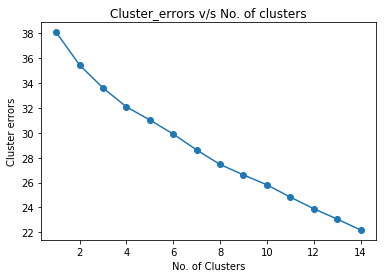

In [31]:
# Elbow plot to find the optimal number of clusters
plt.plot(clusters_df.num_of_clusters, clusters_df.cluster_errors, marker = "o" )

# Title and axis
plt.xlabel('No. of Clusters')
plt.ylabel('Cluster errors')
plt.title('Cluster_errors v/s No. of clusters')

In [32]:
# After No. of clusters=5, the cluster errors converge

num_clusters = 5  

k_means = KMeans(n_clusters=num_clusters, random_state=7)
k_means.fit(dr_norm)

# Cluster label for each stock
labels = k_means.labels_
cluster_labels = labels.tolist()
print('\ncluster_labels\n', cluster_labels)

# To find unique labels
unique_labels = list(set(cluster_labels))
print('\nunique_labels\n', unique_labels)

# Cluster centroids
cluster_centroids = np.array(k_means.cluster_centers_)
print('\ncluster_centroids \n', cluster_centroids)

# results
results = pd.DataFrame([daily_returns.index, labels]).T
results.columns = ['Ticker_index', 'Cluster_label']


# Dataframe with Ticker_name, Ticker_index, Cluster_label
ticker_df = pd.DataFrame({'Ticker_name':tickers})
result_df = pd.DataFrame()
result_df = pd.concat([ticker_df, results], axis=1)
#result_df

# Sort result_df by cluster label
sorted_df = result_df.sort_values('Cluster_label')
sorted_df



cluster_labels
 [3, 4, 4, 2, 3, 3, 3, 3, 3, 0, 2, 0, 2, 3, 0, 1, 3, 3, 3, 3, 0, 4, 3, 3, 3, 3, 1, 0, 4, 3, 3, 2, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 1, 1, 4, 3, 3, 1, 3, 3]

unique_labels
 [0, 1, 2, 3, 4]

cluster_centroids 
 [[ 0.          0.02443229  0.00839331 ... -0.00588855 -0.00989913
  -0.00777978]
 [ 0.          0.0005362   0.01429005 ... -0.00338518  0.0306845
  -0.01296601]
 [ 0.          0.01356413  0.00040208 ... -0.00432515  0.00396827
  -0.00013006]
 [ 0.          0.01180922  0.00402806 ... -0.00309406  0.0095729
  -0.0139569 ]
 [ 0.         -0.00034711  0.00272639 ... -0.00097065  0.01379986
  -0.02181085]]


Ticker_name  Ticker_index  Cluster_label
14   EICHERMOT.NS            14              0
37    RELIANCE.NS            37              0
27  INDUSINDBK.NS            27              0
11       CIPLA.NS            11              0
35        ONGC.NS            35              0
9     INFRATEL.NS             9              0
20   HINDPETRO.NS            20              0
43       TECHM.NS            43              1
26         IOC.NS            26              1
15        GAIL.NS            15              1
47       WIPRO.NS            47              1
42   TATASTEEL.NS            42              1
31       LUPIN.NS            31              2
3   AUROPHARMA.NS             3              2
12   COALINDIA.NS            12              2
39   SUNPHARMA.NS            39              2
10    BOSCHLTD.NS            10              2
32         M&M.NS            32              3
30          LT.NS            30              3
33      MARUTI.NS            33              3
34        NTPC.NS            34              3
0   ADANIPORTS.NS             0              3
38        SBIN.NS            38              3
40         TCS.NS            40              3
41  TATAMOTORS.NS            41              3
45  ULTRACEMCO.NS            45              3
46        VEDL.NS            46              3
36   POWERGRID.NS            36              3
29   KOTAKBANK.NS            29              3
24   ICICIBANK.NS            24              3
25  IBULHSGFIN.NS            25              3
4     AXISBANK.NS             4              3
5   BAJAJ-AUTO.NS             5              3
6   BAJFINANCE.NS             6              3
7         BPCL.NS             7              3
8   BHARTIARTL.NS             8              3
16     HCLTECH.NS            16              3
13     DRREDDY.NS            13              3
18  HEROMOTOCO.NS            18              3
19    HINDALCO.NS            19              3
22        HDFC.NS            22              3
23         ITC.NS            23              3
48     YESBANK.NS            48              3
17    HDFCBANK.NS            17              3
49        ZEEL.NS            49              3
28        INFY.NS            28              4
21  HINDUNILVR.NS            21              4
44         UPL.NS            44              4
2   ASIANPAINT.NS             2              4
1    AMBUJACEM.NS             1              4

In [33]:
# Compute minimum distances between centroid of each cluster and set of points in the respective cluster

from sklearn.metrics import pairwise_distances_argmin_min

closest_ticker_ids = []
ticker_indices_within_i_cluster = []


data_list = dr_norm.tolist()
#print('type(data_list)', type(data_list))
#print('len(data_list)', len(data_list))
#print('data_list', data_list)

for i in range(0, num_clusters):
    
    clust_centroid = cluster_centroids[i]
    #print('\nCluster centroid for cluster {}'.format(i))
    #print(clust_centroid)
    
    ticker_indices_within_i_cluster = result_df.loc[result_df['Cluster_label'] == i, 'Ticker_index'].tolist()
    print('\nTicker indices in cluster {}'.format(i))
    print(ticker_indices_within_i_cluster)   

    one_cluster_data_mat = np.zeros((len(ticker_indices_within_i_cluster), cluster_centroids.shape[1]))
    #print('\nInitially one_cluster_data_mat has zero values\n', one_cluster_data_mat)
    
    for row_num, data_idx in enumerate(ticker_indices_within_i_cluster):
        one_row = dr_norm[data_idx]
        #print('\none_row', one_row)
        one_cluster_data_mat[row_num] = one_row
        #print('\none_cluster_data_mat[row_num]', one_cluster_data_mat)
    #print('\n')    
    #print('one_cluster_data_mat filled with co-ordinates of ticker_ids of a cluster\n', one_cluster_data_mat)

    closest, distances = pairwise_distances_argmin_min(clust_centroid.reshape(1, -1), one_cluster_data_mat)    
    closest_idx_in_one_cluster_data_mat = closest[0]
    closest_data_row_num = ticker_indices_within_i_cluster[closest_idx_in_one_cluster_data_mat]    
    #print('\nclosest_data_row_num', closest_data_row_num)
    
    data_id = dr_norm[closest_data_row_num]
    data_id_list = data_id.tolist()
    #print('\ndata_id_list', data_id_list)
    #print('\ntype(data_id_list)', type(data_id_list))    
   
    ticker_id = data_list.index(data_id_list)
    #print('\nticker_id', ticker_id)
   
    closest_ticker_ids.append(ticker_id)



Ticker indices in cluster 0
[9, 11, 14, 20, 27, 35, 37]

Ticker indices in cluster 1
[15, 26, 42, 43, 47]

Ticker indices in cluster 2
[3, 10, 12, 31, 39]

Ticker indices in cluster 3
[0, 4, 5, 6, 7, 8, 13, 16, 17, 18, 19, 22, 23, 24, 25, 29, 30, 32, 33, 34, 36, 38, 40, 41, 45, 46, 48, 49]

Ticker indices in cluster 4
[1, 2, 21, 28, 44]


In [34]:
print('\n\n*************** We can create stock-portfolio of the below ticker_ids ***************')
print('\nFor cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are {}'.format(closest_ticker_ids))




*************** We can create stock-portfolio of the below ticker_ids ***************

For cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are [9, 42, 31, 30, 1]


In [35]:
# ticker_names
ticker_names = pd.DataFrame()

for ticker_id in closest_ticker_ids:
    temp = pd.DataFrame(result_df.loc[result_df['Ticker_index'] == ticker_id, 'Ticker_name'])
    #print(temp)
    ticker_names = ticker_names.append(temp)

ticker_names = ticker_names.reset_index()
# Rename index column as 'Cluster_No.'
ticker_names.index.name = 'Cluster_No.'
ticker_names.columns = ['Ticker_index', 'Ticker_name']


# Portfolio of stocks

In [36]:
# Writing the ticker names of the portfolio into .csv file
ticker_names.to_csv('Portfolio_stocks.csv')
print('Portfolio of stocks\n')
ticker_names

Portfolio of stocks



Ticker_index   Ticker_name
Cluster_No.                            
0                       9   INFRATEL.NS
1                      42  TATASTEEL.NS
2                      31      LUPIN.NS
3                      30         LT.NS
4                       1  AMBUJACEM.NS

# Investment startegy:
# How to distribute funds among the portfolio of stocks to get maximum returns with minimum risk?

# Portfolio Optimization

In [37]:
portfolio_df = pd.read_csv('Portfolio_stocks.csv', index_col=0)
print('Portfolio of stocks')
portfolio_df

Portfolio of stocks


Ticker_index   Ticker_name
Cluster_No.                            
0                       9   INFRATEL.NS
1                      42  TATASTEEL.NS
2                      31      LUPIN.NS
3                      30         LT.NS
4                       1  AMBUJACEM.NS

In [38]:
port_stocks = portfolio_df['Ticker_name'].values.tolist()
port_stocks

['INFRATEL.NS', 'TATASTEEL.NS', 'LUPIN.NS', 'LT.NS', 'AMBUJACEM.NS']

In [39]:
adj_close_df = pd.read_csv('stocks_adj_close.csv', index_col=0)[port_stocks]
adj_close_df.head()

INFRATEL.NS  TATASTEEL.NS    LUPIN.NS       LT.NS  AMBUJACEM.NS
Date                                                                       
2013-01-01   175.099014    368.073029  599.083557  646.220032    184.509155
2013-01-02   178.419449    368.031586  599.278503  656.022888    186.749207
2013-01-03   180.943008    371.516693  593.382141  650.972412    188.760681
2013-01-04   183.422272    364.125061  589.142761  647.453186    188.440704
2013-01-07   183.643631    370.341492  583.587463  631.604065    186.383499



***************Analysis of individual stock in the portfolio***************

The annualised mean return of stock INFRATEL.NS is 0.21, and the annualised volatility (standard deviation) is 0.35

The annualised mean return of stock TATASTEEL.NS is 0.19, and the annualised volatility (standard deviation) is 0.36

The annualised mean return of stock LUPIN.NS is 0.12, and the annualised volatility (standard deviation) is 0.28

The annualised mean return of stock LT.NS is 0.18, and the annualised volatility (standard deviation) is 0.29

The annualised mean return of stock AMBUJACEM.NS is 0.11, and the annualised volatility (standard deviation) is 0.28


******************************For the entire Portfolio******************************

Portfolio expected annualised return is 0.16 and volatility is 0.19

*************************************************************************************


Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual sto

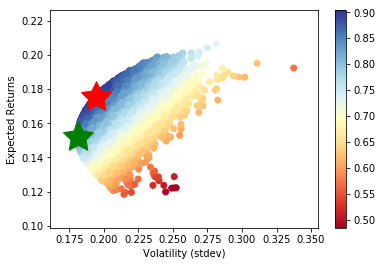

In [40]:


print('\n\n***************Analysis of individual stock in the portfolio***************')
for i in range(0, len(port_stocks)):

    returns = adj_close_df.iloc[:, i].pct_change()

    mean_return = returns.mean()
    return_stdev = returns.std()

    annualised_return = round(mean_return * 252, 2) # 252 trading days in an year
    annualised_stdev = round(return_stdev * np.sqrt(252), 2)

    print ('\nThe annualised mean return of stock {} is {}, and the annualised volatility (standard deviation) is {}'
           .format(port_stocks[i], annualised_return, annualised_stdev))
    
    
""" Similarly, calculate the expected return and volatility (standard deviation) for 
the entire portfolio of stocks. This will capture the benefits of diversification of less than perfect correlation 
between the stocks in the portfolio. """

""" We need our first input, the weights of the stocks in the portfolio – that is, 
how much of each stock do we hold as a percentage of the entire portfolio holdings.
Lets initially assume equal weights"(0.20 in our case) for all the 5 stocks in this portfolio. """

""" We can calculate the portfolio expected return and volatility as follows: """

#convert daily stock prices into daily returns
returns = adj_close_df.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set array holding portfolio weights of each stock
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])
 
#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252, 2)

#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252), 2)
 
print('\n\n******************************For the entire Portfolio******************************')
print('\nPortfolio expected annualised return is {} and volatility is {}'.format(portfolio_return, portfolio_std_dev))
print('\n*************************************************************************************\n\n')    
    
"""We now know the expected return and volatility of our current portfolio. 
But what if we aren’t happy with the level of volatility of our current portfolio and would like to reduce it? 
What if we are willing to take on more risk in search of a higher expected return? 
How can we rearrange the weight of each stock in our portfolio to achieve these goals?"""


"""We can use Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual stocks 
(obviously making sure the weights sum to 100%) and then calculate the expected return, expected volatility and Sharpe Ratio 
for each of the randomly generated portfolios."""

print('Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual stocks\n')

#convert daily stock prices into daily returns
returns = adj_close_df.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set number of runs of random portfolio weights
num_portfolios = 25000
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(port_stocks)-1, num_portfolios))
 
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
 
"""convert results array to Pandas DataFrame"""
results_frame = pd.DataFrame(results.T, columns=['Returns', 'Volatility', 'Sharpe_Ratio',
                                                 port_stocks[0], port_stocks[1],
                                                 port_stocks[2], port_stocks[3], port_stocks[4]])
 
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe_Ratio'].idxmax()]
print('type(max_sharpe_port)', type(max_sharpe_port))

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['Volatility'].idxmin()]
print('type(min_vol_port)', type(min_vol_port))

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.Volatility, results_frame.Returns, c=results_frame.Sharpe_Ratio, cmap='RdYlBu')
plt.xlabel('Volatility (stdev)')
plt.ylabel('Expected Returns')
plt.colorbar()

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker=(5,1,0), color='r',s=1000)

#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1], min_vol_port[0], marker=(5,1,0), color='g', s=1000)


### Type-1: "Portfolio with Maximum Sharpe Ratio" - RED star in the above plot

In [41]:
print('\n"Type-1: Portfolio with Maximum Sharpe Ratio"\n')
print('Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-1 portfolio\n')
print(max_sharpe_port)


"Type-1: Portfolio with Maximum Sharpe Ratio"

Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-1 portfolio

Returns         0.175315
Volatility      0.194038
Sharpe_Ratio    0.903508
INFRATEL.NS     0.305654
TATASTEEL.NS    0.124366
LUPIN.NS        0.237861
LT.NS           0.310401
AMBUJACEM.NS    0.021718
Name: 19519, dtype: float64


### Type-2: "Portfolio with Minimum Volatility" - GREEN star in the above plot

In [42]:
print('\n"Type-2: Portfolio with Minimum Volatility (stdev)"\n')
print('Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-2 portfolio\n')
print(min_vol_port)


"Type-2: Portfolio with Minimum Volatility (stdev)"

Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-2 portfolio

Returns         0.151947
Volatility      0.180951
Sharpe_Ratio    0.839712
INFRATEL.NS     0.212749
TATASTEEL.NS    0.025607
LUPIN.NS        0.332157
LT.NS           0.211842
AMBUJACEM.NS    0.217645
Name: 9236, dtype: float64


# Fetching data for each stock in the portfolio of stocks

In [43]:
trading_tickers = pd.read_csv('Portfolio_stocks.csv', index_col=0)
trading_tickers

Ticker_index   Ticker_name
Cluster_No.                            
0                       9   INFRATEL.NS
1                      42  TATASTEEL.NS
2                      31      LUPIN.NS
3                      30         LT.NS
4                       1  AMBUJACEM.NS

In [44]:
tickers_for_model = trading_tickers.Ticker_name.tolist()
tickers_for_model

['INFRATEL.NS', 'TATASTEEL.NS', 'LUPIN.NS', 'LT.NS', 'AMBUJACEM.NS']

### Fetching data for NIFTY 50 (^NSEI)

In [45]:
nse =  pdr.get_data_yahoo('^NSEI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [46]:
nse.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  5982.600098  6006.049805  5982.000000  5993.250000  5993.250000   
2013-01-03  6015.799805  6017.000000  5986.549805  6009.500000  6009.500000   
2013-01-04  6011.950195  6020.750000  5981.549805  6016.149902  6016.149902   
2013-01-07  6042.149902  6042.149902  5977.149902  5988.399902  5988.399902   
2013-01-08  5983.450195  6007.049805  5964.399902  6001.700195  6001.700195   

            Volume  
Date                
2013-01-02       0  
2013-01-03       0  
2013-01-04       0  
2013-01-07       0  
2013-01-08       0

In [47]:
# Shifting adjusted close prices by 1 day to refelct previous day adjusted close prices

nse['Adj Close'] = nse['Adj Close'].shift(1)

In [48]:
nse.rename(columns={'Adj Close': 'NSE'}, inplace=True)
nse.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nse.head()

NSE
Date                   
2013-01-02          NaN
2013-01-03  5993.250000
2013-01-04  6009.500000
2013-01-07  6016.149902
2013-01-08  5988.399902

### Fetching data for S&P 500 (^GSPC)

In [49]:
spy =  pdr.get_data_yahoo('^GSPC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [50]:
spy.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  1426.189941  1462.430054  1426.189941  1462.420044  1462.420044   
2013-01-03  1462.420044  1465.469971  1455.530029  1459.369995  1459.369995   
2013-01-04  1459.369995  1467.939941  1458.989990  1466.469971  1466.469971   
2013-01-07  1466.469971  1466.469971  1456.619995  1461.890015  1461.890015   
2013-01-08  1461.890015  1461.890015  1451.640015  1457.150024  1457.150024   

                Volume  
Date                    
2013-01-02  4202600000  
2013-01-03  3829730000  
2013-01-04  3424290000  
2013-01-07  3304970000  
2013-01-08  3601600000

In [51]:
spy.rename(columns={'Adj Close': 'SPY'}, inplace=True)
spy.drop (['Open','Close','High','Low','Volume'] , axis=1 , inplace = True)
spy.head()

SPY
Date                   
2013-01-02  1462.420044
2013-01-03  1459.369995
2013-01-04  1466.469971
2013-01-07  1461.890015
2013-01-08  1457.150024

### Fetching data for Dow Jones Industrial Average (^DJI)

In [52]:
dji =  pdr.get_data_yahoo('^DJI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [53]:
dji.head()

Open          High           Low         Close  \
Date                                                                 
2013-01-02  13104.299805  13412.709961  13104.299805  13412.549805   
2013-01-03  13413.009766  13430.599609  13358.299805  13391.360352   
2013-01-04  13391.049805  13447.110352  13376.230469  13435.209961   
2013-01-07  13436.129883  13436.129883  13343.320313  13384.290039   
2013-01-08  13377.419922  13377.419922  13293.129883  13328.849609   

               Adj Close     Volume  
Date                                 
2013-01-02  13412.549805  161430000  
2013-01-03  13391.360352  129630000  
2013-01-04  13435.209961  107590000  
2013-01-07  13384.290039  113120000  
2013-01-08  13328.849609  129570000

In [54]:
dji.rename(columns={'Adj Close': 'DJ'}, inplace=True)
dji.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
dji.head()

DJ
Date                    
2013-01-02  13412.549805
2013-01-03  13391.360352
2013-01-04  13435.209961
2013-01-07  13384.290039
2013-01-08  13328.849609

### Fetching data for NASDAQ Composite (^IXIC)

In [55]:
nasdaq =  pdr.get_data_yahoo('^IXIC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [56]:
nasdaq.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  3091.330078  3112.649902  3083.489990  3112.260010  3112.260010   
2013-01-03  3108.489990  3118.179932  3092.280029  3100.570068  3100.570068   
2013-01-04  3100.879883  3108.439941  3090.810059  3101.659912  3101.659912   
2013-01-07  3089.169922  3102.350098  3083.879883  3098.810059  3098.810059   
2013-01-08  3098.459961  3103.389893  3076.600098  3091.810059  3091.810059   

                Volume  
Date                    
2013-01-02  2111300000  
2013-01-03  1769420000  
2013-01-04  1745140000  
2013-01-07  1702540000  
2013-01-08  1744380000

In [57]:
nasdaq.rename(columns={'Adj Close': 'NASDAQ'}, inplace=True)
nasdaq.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nasdaq.head()

NASDAQ
Date                   
2013-01-02  3112.260010
2013-01-03  3100.570068
2013-01-04  3101.659912
2013-01-07  3098.810059
2013-01-08  3091.810059

### Fetching data for individual stocks from the portfolio of stocks

### Fetching data for Stock-1

In [58]:
print('Fetching historic stock data for {}'.format(tickers_for_model[0]))

Fetching historic stock data for INFRATEL.NS


In [59]:
stock1_df =  pdr.get_data_yahoo(tickers_for_model[0], start_date, end_date)
stock1_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume  
Date                 
2013-01-01  2619486  
2013-01-02  5470399  
2013-01-03  3626134  
2013-01-04  4188477  
2013-01-07  2632614

In [60]:
# Fetching 'VWAP' from nsepy package for the same stock

stock1 = tickers_for_model[0].split('.')[0]
stock1

'INFRATEL'

In [61]:
# Date format for nsepy package 'yyyy,mm,dd'

data = get_history(symbol=stock1, start=date(2013,1,1),  end=date(2018,1,1))
data['VWAP'].head()

Date
2013-01-01    197.64
2013-01-02    200.96
2013-01-03    204.11
2013-01-04    207.22
2013-01-07    207.99
Name: VWAP, dtype: float64

In [62]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock1_df = stock1_df.join(data['VWAP'])
stock1_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume    VWAP  
Date                         
2013-01-01  2619486  197.64  
2013-01-02  5470399  200.96  
2013-01-03  3626134  204.11  
2013-01-04  4188477  207.22  
2013-01-07  2632614  207.99

### Joining individual stock data with nse, spy, dji, nasdaq data

In [63]:
stock1_df = stock1_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock1_df = stock1_df.fillna(method='ffill')

# Backward fill
stock1_df = stock1_df.fillna(method = 'bfill')

stock1_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  2619486  197.64  5993.250000  1462.420044  13412.549805   
2013-01-02  5470399  200.96  5993.250000  1462.420044  13412.549805   
2013-01-03  3626134  204.11  5993.250000  1459.369995  13391.360352   
2013-01-04  4188477  207.22  6009.500000  1466.469971  13435.209961   
2013-01-07  2632614  207.99  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Fetching data for Stock-2

In [64]:
print('Fetching historic stock data for {}'.format(tickers_for_model[1]))

Fetching historic stock data for TATASTEEL.NS


In [65]:
stock2_df =  pdr.get_data_yahoo(tickers_for_model[1], start_date, end_date)
stock2_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume  
Date                 
2013-01-01  3258417  
2013-01-02  2725650  
2013-01-03  3446967  
2013-01-04  3825854  
2013-01-07  7192053

In [66]:
# Fetching 'VWAP' from nsepy package

stock2 = tickers_for_model[1].split('.')[0]
stock2

'TATASTEEL'

In [67]:
data = get_history(symbol=stock2, start=date(2013,1,1),  end=date(2018,1,1))
data['VWAP'].head()

Date
2013-01-01    436.73
2013-01-02    441.05
2013-01-03    442.04
2013-01-04    434.01
2013-01-07    439.60
Name: VWAP, dtype: float64

In [68]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock2_df = stock2_df.join(data['VWAP'])
stock2_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume    VWAP  
Date                         
2013-01-01  3258417  436.73  
2013-01-02  2725650  441.05  
2013-01-03  3446967  442.04  
2013-01-04  3825854  434.01  
2013-01-07  7192053  439.60

### Joining individual stock data with nse, spy, dji, nasdaq data

In [69]:
stock2_df = stock2_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock2_df = stock2_df.fillna(method='ffill')

# Backward fill
stock2_df = stock2_df.fillna(method = 'bfill')

stock2_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  3258417  436.73  5993.250000  1462.420044  13412.549805   
2013-01-02  2725650  441.05  5993.250000  1462.420044  13412.549805   
2013-01-03  3446967  442.04  5993.250000  1459.369995  13391.360352   
2013-01-04  3825854  434.01  6009.500000  1466.469971  13435.209961   
2013-01-07  7192053  439.60  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Fetching data for Stock-3

In [70]:
print('Fetching historic stock data for {}'.format(tickers_for_model[2]))

Fetching historic stock data for LUPIN.NS


In [71]:
stock3_df =  pdr.get_data_yahoo(tickers_for_model[2], start_date, end_date)
stock3_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557  245907
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503  381107
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141  475306
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761  522833
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463  687589

In [72]:
# Fetching 'VWAP' from nsepy package

stock3 = tickers_for_model[2].split('.')[0]
stock3

'LUPIN'

In [73]:
data = get_history(symbol=stock3, start=date(2013,1,1),  end=date(2018,1,1))
data['VWAP'].head()

Date
2013-01-01    615.70
2013-01-02    616.25
2013-01-03    609.67
2013-01-04    605.92
2013-01-07    601.43
Name: VWAP, dtype: float64

In [74]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock3_df = stock3_df.join(data['VWAP'])
stock3_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   

            Volume    VWAP  
Date                        
2013-01-01  245907  615.70  
2013-01-02  381107  616.25  
2013-01-03  475306  609.67  
2013-01-04  522833  605.92  
2013-01-07  687589  601.43

### Joining individual stock data with nse, spy, dji, nasdaq data

In [75]:
stock3_df = stock3_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock3_df = stock3_df.fillna(method='ffill')

# Backward fill
stock3_df = stock3_df.fillna(method = 'bfill')

stock3_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   

            Volume    VWAP          NSE          SPY            DJ  \
Date                                                                 
2013-01-01  245907  615.70  5993.250000  1462.420044  13412.549805   
2013-01-02  381107  616.25  5993.250000  1462.420044  13412.549805   
2013-01-03  475306  609.67  5993.250000  1459.369995  13391.360352   
2013-01-04  522833  605.92  6009.500000  1466.469971  13435.209961   
2013-01-07  687589  601.43  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Fetching data for Stock-4

In [76]:
print('Fetching historic stock data for {}'.format(tickers_for_model[3]))

Fetching historic stock data for LT.NS


In [77]:
stock4_df =  pdr.get_data_yahoo(tickers_for_model[3], start_date, end_date)
stock4_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  718.310974  725.666992  718.067017  722.177979  646.220032   
2013-01-02  728.622009  735.556030  725.132996  733.132996  656.022888   
2013-01-03  735.556030  738.356018  724.443970  727.489014  650.972412   
2013-01-04  724.888977  727.067017  719.510986  723.556030  647.453186   
2013-01-07  725.421997  725.778015  704.443970  705.843994  631.604065   

             Volume  
Date                 
2013-01-01  1721671  
2013-01-02  2631400  
2013-01-03  2839403  
2013-01-04  2227388  
2013-01-07  4125614

In [78]:
# Fetching 'VWAP' from nsepy package

stock4 = tickers_for_model[3].split('.')[0]
stock4

'LT'

In [79]:
data = get_history(symbol=stock4, start=date(2013,1,1),  end=date(2018,1,1))
data['VWAP'].head()

Date
2013-01-01    1626.20
2013-01-02    1647.15
2013-01-03    1643.04
2013-01-04    1627.40
2013-01-07    1600.26
Name: VWAP, dtype: float64

In [80]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock4_df = stock4_df.join(data['VWAP'])
stock4_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  718.310974  725.666992  718.067017  722.177979  646.220032   
2013-01-02  728.622009  735.556030  725.132996  733.132996  656.022888   
2013-01-03  735.556030  738.356018  724.443970  727.489014  650.972412   
2013-01-04  724.888977  727.067017  719.510986  723.556030  647.453186   
2013-01-07  725.421997  725.778015  704.443970  705.843994  631.604065   

             Volume     VWAP  
Date                          
2013-01-01  1721671  1626.20  
2013-01-02  2631400  1647.15  
2013-01-03  2839403  1643.04  
2013-01-04  2227388  1627.40  
2013-01-07  4125614  1600.26

### Joining individual stock data with nse, spy, dji, nasdaq data

In [81]:
stock4_df = stock4_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock4_df = stock4_df.fillna(method='ffill')

# Backward fill
stock4_df = stock4_df.fillna(method = 'bfill')

stock4_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  718.310974  725.666992  718.067017  722.177979  646.220032   
2013-01-02  728.622009  735.556030  725.132996  733.132996  656.022888   
2013-01-03  735.556030  738.356018  724.443970  727.489014  650.972412   
2013-01-04  724.888977  727.067017  719.510986  723.556030  647.453186   
2013-01-07  725.421997  725.778015  704.443970  705.843994  631.604065   

             Volume     VWAP          NSE          SPY            DJ  \
Date                                                                   
2013-01-01  1721671  1626.20  5993.250000  1462.420044  13412.549805   
2013-01-02  2631400  1647.15  5993.250000  1462.420044  13412.549805   
2013-01-03  2839403  1643.04  5993.250000  1459.369995  13391.360352   
2013-01-04  2227388  1627.40  6009.500000  1466.469971  13435.209961   
2013-01-07  4125614  1600.26  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Fetching data for Stock-5

In [82]:
print('Fetching historic stock data for {}'.format(tickers_for_model[4]))

Fetching historic stock data for AMBUJACEM.NS


In [83]:
stock5_df =  pdr.get_data_yahoo(tickers_for_model[4], start_date, end_date)
stock5_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  201.750000  203.850006  201.350006  201.800003  184.509155   
2013-01-02  202.699997  205.899994  202.699997  204.250000  186.749207   
2013-01-03  204.550003  208.500000  204.550003  206.449997  188.760681   
2013-01-04  206.500000  208.250000  204.550003  206.100006  188.440704   
2013-01-07  206.149994  207.300003  201.399994  203.850006  186.383499   

             Volume  
Date                 
2013-01-01  1634669  
2013-01-02  2310561  
2013-01-03  2794708  
2013-01-04  3021358  
2013-01-07  2317712

In [84]:
# Fetching 'VWAP' from nsepy package

stock5 = tickers_for_model[4].split('.')[0]
stock5

'AMBUJACEM'

In [85]:
data = get_history(symbol=stock5, start=date(2013,1,1),  end=date(2018,1,1))
data['VWAP'].head()

Date
2013-01-01    202.29
2013-01-02    204.72
2013-01-03    206.68
2013-01-04    206.55
2013-01-07    204.60
Name: VWAP, dtype: float64

In [86]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock5_df = stock5_df.join(data['VWAP'])
stock5_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  201.750000  203.850006  201.350006  201.800003  184.509155   
2013-01-02  202.699997  205.899994  202.699997  204.250000  186.749207   
2013-01-03  204.550003  208.500000  204.550003  206.449997  188.760681   
2013-01-04  206.500000  208.250000  204.550003  206.100006  188.440704   
2013-01-07  206.149994  207.300003  201.399994  203.850006  186.383499   

             Volume    VWAP  
Date                         
2013-01-01  1634669  202.29  
2013-01-02  2310561  204.72  
2013-01-03  2794708  206.68  
2013-01-04  3021358  206.55  
2013-01-07  2317712  204.60

### Joining individual stock data with nse, spy, dji, nasdaq data

In [87]:
stock5_df = stock5_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock5_df = stock5_df.fillna(method='ffill')

# Backward fill
stock5_df = stock5_df.fillna(method = 'bfill')

stock5_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  201.750000  203.850006  201.350006  201.800003  184.509155   
2013-01-02  202.699997  205.899994  202.699997  204.250000  186.749207   
2013-01-03  204.550003  208.500000  204.550003  206.449997  188.760681   
2013-01-04  206.500000  208.250000  204.550003  206.100006  188.440704   
2013-01-07  206.149994  207.300003  201.399994  203.850006  186.383499   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  1634669  202.29  5993.250000  1462.420044  13412.549805   
2013-01-02  2310561  204.72  5993.250000  1462.420044  13412.549805   
2013-01-03  2794708  206.68  5993.250000  1459.369995  13391.360352   
2013-01-04  3021358  206.55  6009.500000  1466.469971  13435.209961   
2013-01-07  2317712  204.60  6016.149902  1461.890015  13384.290039   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-07  3098.810059

### Creating stock_df for each stock in the portfolio of stocks

In [88]:
def add_vars_to_stock_df(tup_dfs, tickers_lst):
    """Creates dataframe for every stock in the portfolio of stocks"""    
    
    # Instantiating Technical Indicators object
    tech_ind = ti.technical_indicators()
    
    def calc_derived_vars(stk_df):
        """Creates dataframe containing derived variables for every stock in the portfolio of stocks"""
        
        # Calling functions from Technical_Indicators file

        stk_df = tech_ind.pcod(stk_df)
        stk_df = tech_ind.hld(stk_df)
        stk_df = tech_ind.stockRsi(stk_df, numOfDays=20)
        stk_df = tech_ind.bbands(stk_df, length=20, numsd=2) 
        stk_df = tech_ind.stma(stk_df, numOfDays=20) 
        stk_df = tech_ind.ltma(stk_df, numOfDays=120) 
        stk_df = tech_ind.ema(stk_df, numOfDays=20) 
        stk_df = tech_ind.scul(stk_df)
        stk_df = tech_ind.scll(stk_df)
        stk_df = tech_ind.stma_cuts_ltma(stk_df)
        stk_df = tech_ind.close_cuts_stma(stk_df)
        stk_df = tech_ind.close_cuts_ltma(stk_df)
        stk_df = tech_ind.daily_returns(stk_df)
        stk_df = tech_ind.daily_returns_NSE(stk_df)
        stk_df = tech_ind.daily_returns_SPY(stk_df)
        stk_df = tech_ind.daily_returns_DOWJONES(stk_df)
        stk_df = tech_ind.daily_returns_NASDAQ(stk_df)
        stk_df = tech_ind.price_movement(stk_df)
        stk_df = tech_ind.beta_values(stk_df)
        

        #time-series prediction for the stock using prophet
        stk_df.reset_index(inplace = True)
        stk_df = stk_df.rename(columns={'index':'Date'})
        stk_df, ts_data = tech_ind.TS_close_price(stk_df)
        
        # Convert date to week-of-day (Sunday, Monday...)
        stk_df['day_of_week'] = stk_df['ds'].dt.weekday_name       
        # Converting categorical 'day_of_week' variable to numeric variable
        le = LabelEncoder()
        new_name = 'le_'+'day_of_week'
        stk_df[new_name] = le.fit_transform(stk_df['day_of_week'])

        stk_df = Sdf.retype(stk_df)
        stk_df['tr'] = stk_df.get('tr') 
        stk_df['atr'] = stk_df.get('atr')
        stk_df['wr_10'] = stk_df.get('wr_10')
        stk_df['kdjk'] = stk_df.get('kdjk')
        stk_df['macd'] = stk_df.get('macd')        
        
        return stk_df
        
    all_data = pd.DataFrame()
    stk_df_lst = []
    
    for i in range(len(tup_dfs)):       
        stk_df = calc_derived_vars(tup_dfs[i])
        stk_df_lst.append(stk_df)     
        
        temp = pd.DataFrame()
        temp = stk_df.copy(deep=True)
        stock_name = tickers_lst[i].split('.')[0]
        temp['stock'] = stock_name
        all_data = pd.concat([all_data, temp])
        
        # Writing the stk_df data to .csv file
        stk_df.to_csv('{}'.format(tickers_lst[i]+'.csv'))
        #print(tickers_lst[i]+'.csv')
        
        
    # Writing the all stock data to .csv file
    all_data.to_csv('all_stock_data.csv')   
    
    tup_stock_dfs = tuple(stk_df_lst)
    return (tup_stock_dfs)    

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  197.750000
1 2013-01-02  201.500000
2 2013-01-03  204.350006
3 2013-01-04  207.149994
4 2013-01-07  207.399994


          ds      y_orig         y
0 2013-01-01  197.750000  5.287004
1 2013-01-02  201.500000  5.305789
2 2013-01-03  204.350006  5.319834
3 2013-01-04  207.149994  5.333443
4 2013-01-07  207.399994  5.334649


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  5.955718    5.909464    6.008685
1224 2017-12-19  5.953526    5.905457    6.001177
1225 2017-12-20  5.953210    5.907622    6.002952
1226 2017-12-21  5.952387    5.901700    6.000299
1227 2017-12-22  5.949206    5.899307    6.003616
1228 2017-12-26  5.943587    5.896383    5.994468
1229 2017-12-27  5.943514    5.890832    5.993370
1230 2017-12-28  5.942989    5.890668    5.989394
1231 2017-12-29  5.940144    5.894480    5.990171
1232 2018-01-01  5.937588

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  417.489014
1 2013-01-02  417.441986
2 2013-01-03  421.394989
3 2013-01-04  413.010986
4 2013-01-07  420.062012


          ds      y_orig         y
0 2013-01-01  417.489014  6.034258
1 2013-01-02  417.441986  6.034146
2 2013-01-03  421.394989  6.043571
3 2013-01-04  413.010986  6.023474
4 2013-01-07  420.062012  6.040402


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  6.526154    6.466503    6.596772
1224 2017-12-19  6.524549    6.463820    6.588577
1225 2017-12-20  6.529107    6.464914    6.590232
1226 2017-12-21  6.528683    6.463181    6.596018
1227 2017-12-22  6.529609    6.463612    6.594201
1228 2017-12-26  6.534337    6.467206    6.597098
1229 2017-12-27  6.540556    6.476518    6.602467
1230 2017-12-28  6.541635    6.473366    6.608862
1231 2017-12-29  6.543870    6.478859    6.610376
1232 2018-01-01  6.550922

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  614.700012
1 2013-01-02  614.900024
2 2013-01-03  608.849976
3 2013-01-04  604.500000
4 2013-01-07  598.799988


          ds      y_orig         y
0 2013-01-01  614.700012  6.421134
1 2013-01-02  614.900024  6.421460
2 2013-01-03  608.849976  6.411572
3 2013-01-04  604.500000  6.404402
4 2013-01-07  598.799988  6.394928


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  6.751181    6.698565    6.798836
1224 2017-12-19  6.748691    6.699665    6.795223
1225 2017-12-20  6.749504    6.701444    6.800214
1226 2017-12-21  6.748202    6.700813    6.797014
1227 2017-12-22  6.747331    6.695638    6.797598
1228 2017-12-26  6.741102    6.693055    6.788461
1229 2017-12-27  6.741335    6.690788    6.789655
1230 2017-12-28  6.739471    6.687349    6.789375
1231 2017-12-29  6.738066    6.687403    6.786633
1232 2018-01-01  6.733556

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  722.177979
1 2013-01-02  733.132996
2 2013-01-03  727.489014
3 2013-01-04  723.556030
4 2013-01-07  705.843994


          ds      y_orig         y
0 2013-01-01  722.177979  6.582272
1 2013-01-02  733.132996  6.597327
2 2013-01-03  727.489014  6.589599
3 2013-01-04  723.556030  6.584178
4 2013-01-07  705.843994  6.559394


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  7.105925    7.060242    7.148331
1224 2017-12-19  7.103192    7.057229    7.146383
1225 2017-12-20  7.102498    7.061310    7.150143
1226 2017-12-21  7.102597    7.054542    7.148147
1227 2017-12-22  7.103289    7.063151    7.147940
1228 2017-12-26  7.099557    7.051672    7.143167
1229 2017-12-27  7.099349    7.053682    7.145469
1230 2017-12-28  7.099945    7.058616    7.145808
1231 2017-12-29  7.101133    7.056600    7.147017
1232 2018-01-01  7.101102

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  201.800003
1 2013-01-02  204.250000
2 2013-01-03  206.449997
3 2013-01-04  206.100006
4 2013-01-07  203.850006


          ds      y_orig         y
0 2013-01-01  201.800003  5.307277
1 2013-01-02  204.250000  5.319345
2 2013-01-03  206.449997  5.330058
3 2013-01-04  206.100006  5.328362
4 2013-01-07  203.850006  5.317384


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  5.590100    5.545534    5.634719
1224 2017-12-19  5.588830    5.545597    5.633692
1225 2017-12-20  5.589183    5.546395    5.634460
1226 2017-12-21  5.589538    5.543528    5.635784
1227 2017-12-22  5.590146    5.550020    5.637467
1228 2017-12-26  5.591598    5.546469    5.636042
1229 2017-12-27  5.592339    5.550183    5.633482
1230 2017-12-28  5.593117    5.548508    5.635165
1231 2017-12-29  5.594173    5.548845    5.640307
1232 2018-01-01  5.597945

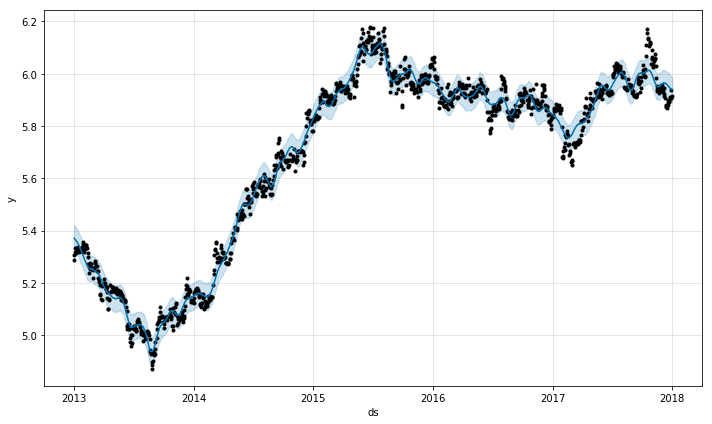

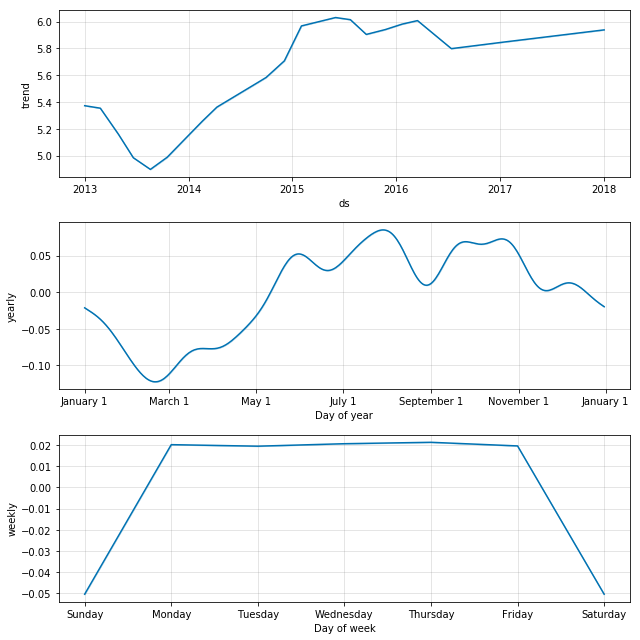

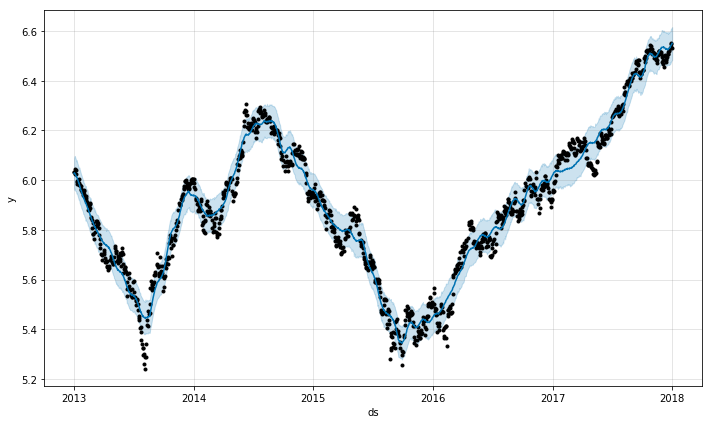

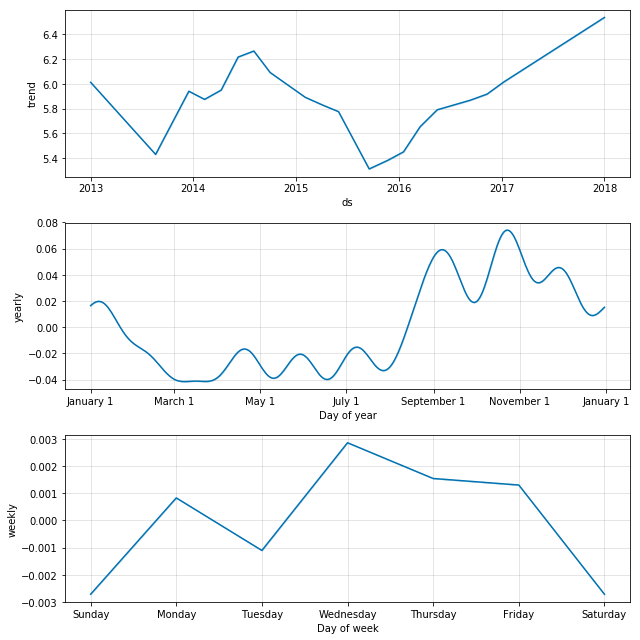

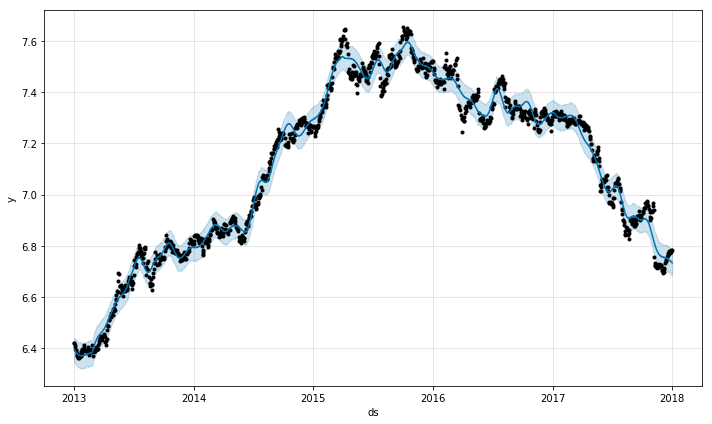

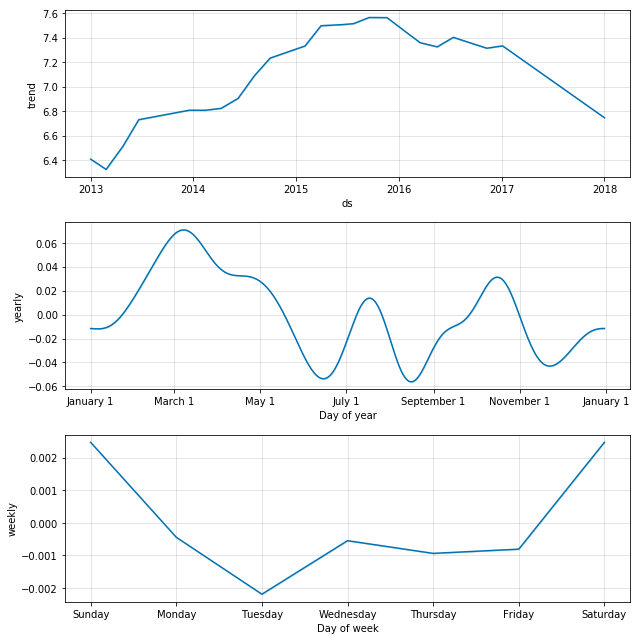

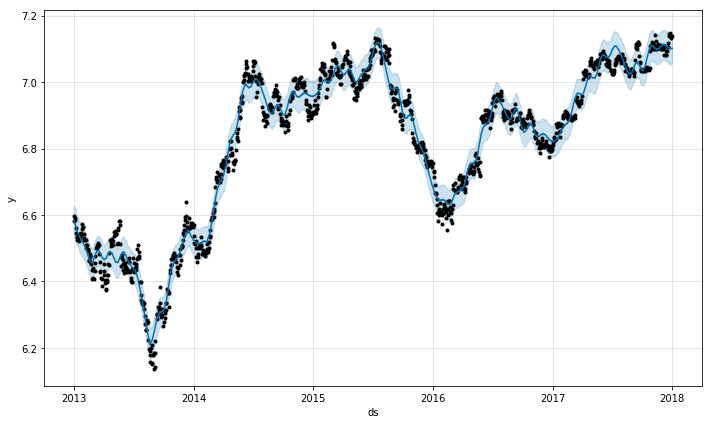

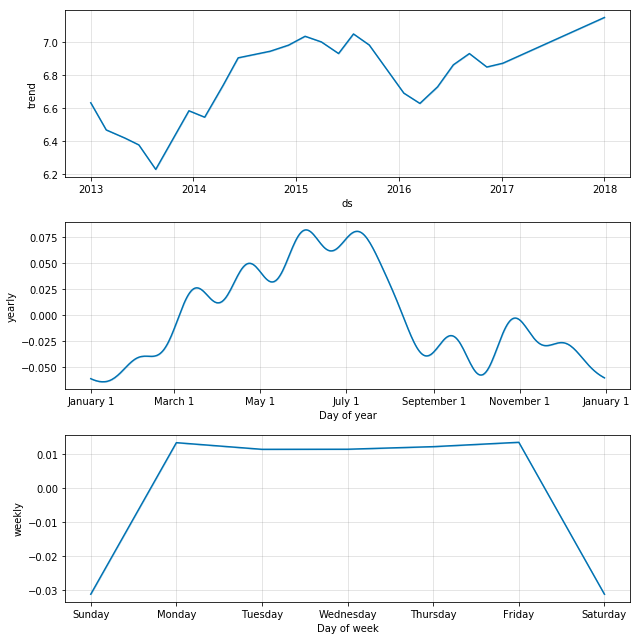

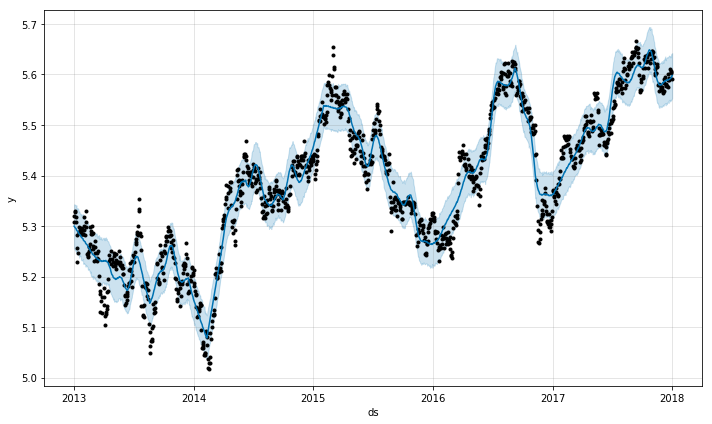

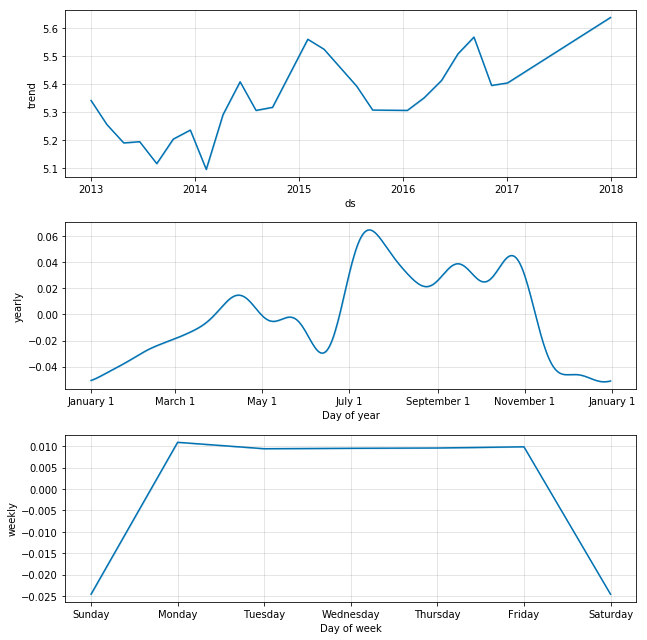

In [89]:
# Creating tuple of stock dataframes
tup_stk_dfs = (stock1_df, stock2_df, stock3_df, stock4_df, stock5_df)

stock1_df, stock2_df, stock3_df, stock4_df, stock5_df = add_vars_to_stock_df(tup_stk_dfs, tickers_for_model)


# EDA, FEATURE SELECTION & MODEL BUILDING FOR STOCK-1

In [90]:
stock1_df.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-01-01  2619486  197.64  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  5470399  200.96  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  3626134  204.11  5993.250000  1459.369995  13391.360352    ...      
2013-01-04  4188477  207.22  6009.500000  1466.469971  13435.209961    ...      
2013-01-07  2632614  207.99  6016.149902  1461.890015  13384.290039    ...      

                 kdjk     kdjd_9       kdjd     kdjj_9       kdjj  \
date                                                                
2013-01-01  54.885046  51.628349  51.628349  61.398441  61.398441   
2013-01-02  60.744606  54.667101  54.667101  72.899616  72.899616   
2013-01-03  68.096420  59.143541  59.143541  86.002179  86.002179   
2013-01-04  72.793434  63.693505  63.693505  90.993292  90.993292   
2013-01-07  76.445610  67.944207  67.944207  93.448417  93.448417   

            close_12_ema  close_26_ema      macd     macds     macdh  
date                                                                  
2013-01-01    197.750000    197.750000  0.000000  0.000000  0.000000  
2013-01-02    199.781250    199.697115  0.084135  0.046741  0.074786  
2013-01-03    201.564437    201.368854  0.195583  0.107742  0.175681  
2013-01-04    203.327579    202.985008  0.342571  0.187291  0.310559  
2013-01-07    204.434039    204.008861  0.425178  0.258057  0.334242  

[5 rows x 54 columns]

In [91]:
stock1_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ds', 'ts_close_pr', 'day_of_week',
       'le_day_of_week', 'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'close_12_ema',
       'close_26_ema', 'macd', 'macds', 'macdh'],
      dtype='object')

### EDA for Stock-1

In [92]:
stock1_df.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-01-01  2619486  197.64  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  5470399  200.96  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  3626134  204.11  5993.250000  1459.369995  13391.360352    ...      
2013-01-04  4188477  207.22  6009.500000  1466.469971  13435.209961    ...      
2013-01-07  2632614  207.99  6016.149902  1461.890015  13384.290039    ...      

                 kdjk     kdjd_9       kdjd     kdjj_9       kdjj  \
date                                                                
2013-01-01  54.885046  51.628349  51.628349  61.398441  61.398441   
2013-01-02  60.744606  54.667101  54.667101  72.899616  72.899616   
2013-01-03  68.096420  59.143541  59.143541  86.002179  86.002179   
2013-01-04  72.793434  63.693505  63.693505  90.993292  90.993292   
2013-01-07  76.445610  67.944207  67.944207  93.448417  93.448417   

            close_12_ema  close_26_ema      macd     macds     macdh  
date                                                                  
2013-01-01    197.750000    197.750000  0.000000  0.000000  0.000000  
2013-01-02    199.781250    199.697115  0.084135  0.046741  0.074786  
2013-01-03    201.564437    201.368854  0.195583  0.107742  0.175681  
2013-01-04    203.327579    202.985008  0.342571  0.187291  0.310559  
2013-01-07    204.434039    204.008861  0.425178  0.258057  0.334242  

[5 rows x 54 columns]

In [93]:
stock1_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ds', 'ts_close_pr', 'day_of_week',
       'le_day_of_week', 'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'close_12_ema',
       'close_26_ema', 'macd', 'macds', 'macdh'],
      dtype='object')

In [94]:
#stock1_df.drop(['ds', 'day_of_week', 'close_-1_s', 'rsv_9', 'kdjk_9', 'kdjd_9', 'kdjj_9', 'close_12_ema', 'close_26_ema'], axis=1, inplace=True)

In [95]:
temp_stock1 = stock1_df[['open', 'high', 'low', 'close', 'adj close', 'volume',
                         'vwap', 'nse', 'spy', 'dj', 'nasdaq', 'pcod', 'hld',
                         'rsi', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'scul',
                         'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b',
                         'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a',
                         'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
                         'beta', 'ts_close_pr','le_day_of_week', 'tr', 'atr', 'wr_10', 'kdjk',
                         'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].copy(deep=True)
temp_stock1.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-01-01  2619486  197.64  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  5470399  200.96  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  3626134  204.11  5993.250000  1459.369995  13391.360352    ...      
2013-01-04  4188477  207.22  6009.500000  1466.469971  13435.209961    ...      
2013-01-07  2632614  207.99  6016.149902  1461.890015  13384.290039    ...      

            le_day_of_week        tr       atr      wr_10       kdjk  \
date                                                                   
2013-01-01               3       NaN       NaN  35.344861  54.885046   
2013-01-02               4  7.350006  7.350006  27.536274  60.744606   
2013-01-03               2  6.500000  6.909262  17.199952  68.096420   
2013-01-04               0  7.649994  7.174680  17.812538  72.793434   
2013-01-07               1  2.899994  5.984448  16.250038  76.445610   

                 kdjd       kdjj      macd     macds     macdh  
date                                                            
2013-01-01  51.628349  61.398441  0.000000  0.000000  0.000000  
2013-01-02  54.667101  72.899616  0.084135  0.046741  0.074786  
2013-01-03  59.143541  86.002179  0.195583  0.107742  0.175681  
2013-01-04  63.693505  90.993292  0.342571  0.187291  0.310559  
2013-01-07  67.944207  93.448417  0.425178  0.258057  0.334242  

[5 rows x 45 columns]

In [96]:
# Summary statistics of numeric data

temp_stock1.describe().T

count          mean           std           min  \
open                 1233.0  3.110800e+02  9.544666e+01    129.000000   
high                 1233.0  3.168530e+02  9.704034e+01    134.800003   
low                  1233.0  3.054869e+02  9.323508e+01    126.500000   
close                1233.0  3.110252e+02  9.494340e+01    130.649994   
adj close            1233.0  2.940330e+02  9.588883e+01    117.969635   
volume               1233.0  1.916653e+06  4.410982e+06      0.000000   
vwap                 1233.0  3.112189e+02  9.503540e+01    131.210000   
nse                  1233.0  7.846945e+03  1.320167e+03   5285.000000   
spy                  1233.0  2.036067e+03  2.782860e+02   1457.150024   
dj                   1233.0  1.781659e+04  2.398317e+03  13328.849609   
nasdaq               1233.0  4.817514e+03  9.327310e+02   3091.810059   
pcod                 1232.0  1.970370e-01  3.032710e+00    -16.850006   
hld                  1233.0  1.136614e+01  7.381491e+00      0.000000   
rsi                  1214.0  5.149357e+01  1.245474e+01     20.918953   
bbul                 1214.0  3.322154e+02  1.016472e+02    152.989000   
bbll                 1214.0  2.906448e+02  8.810496e+01    124.053000   
stma                 1214.0  3.114301e+02  9.436955e+01    141.562499   
ltma                 1114.0  3.129693e+02  9.072481e+01    153.312500   
ema                  1215.0  3.112967e+02  9.411947e+01    141.059028   
scul                 1233.0  6.812652e-02  2.520651e-01      0.000000   
scll                 1233.0  4.298459e-02  2.029047e-01      0.000000   
stma_cut_ltma_b      1233.0  5.677210e-03  7.516356e-02      0.000000   
stma_cut_ltma_a      1233.0  5.677210e-03  7.516356e-02      0.000000   
close_pr_cut_stma_b  1233.0  6.731549e-02  2.506693e-01      0.000000   
close_pr_cut_stma_a  1233.0  6.731549e-02  2.506693e-01      0.000000   
close_pr_cut_ltma_b  1233.0  2.433090e-02  1.541369e-01      0.000000   
close_pr_cut_ltma_a  1233.0  2.433090e-02  1.541369e-01      0.000000   
dr_stock             1232.0  8.512401e-04  2.211434e-02     -0.106176   
dr_nse               1232.0  4.957585e-04  9.184660e-03     -0.059151   
dr_spy               1232.0  5.189119e-04  7.623811e-03     -0.039414   
dr_dj                1232.0  5.233702e-04  7.347040e-03     -0.035748   
dr_nasdaq            1232.0  6.873394e-04  8.993809e-03     -0.041152   
price_movmnt         1232.0  5.243506e-01  4.996095e-01      0.000000   
beta                 1233.0 -3.387538e+00  1.840823e+02  -5964.152308   
ts_close_pr          1233.0  3.106993e+02  9.354096e+01    139.477984   
le_day_of_week       1233.0  2.021898e+00  1.412608e+00      0.000000   
tr                   1232.0  1.166936e+01  7.553938e+00      0.000000   
atr                  1232.0  1.162420e+01  4.811724e+00      4.295936   
wr_10                1233.0  4.909434e+01  2.610893e+01      0.000000   
kdjk                 1233.0  5.066253e+01  1.952294e+01      7.140662   
kdjd                 1233.0  5.062952e+01  1.669532e+01     10.271495   
kdjj                 1233.0  5.072855e+01  3.151331e+01    -11.508203   
macd                 1233.0  9.869474e-01  6.072799e+00    -15.485848   
macds                1233.0  1.012998e+00  5.601592e+00    -12.967049   
macdh                1233.0 -5.210058e-02  4.097471e+00    -14.641195   

                               25%           50%           75%           max  
open                    206.949997  3.526000e+02  3.820500e+02  4.830000e+02  
high                    210.250000  3.580000e+02  3.879000e+02  4.996500e+02  
low                     204.000000  3.471500e+02  3.755500e+02  4.728000e+02  
close                   206.600006  3.523500e+02  3.820500e+02  4.823000e+02  
adj close               183.929703  3.357542e+02  3.681500e+02  4.792000e+02  
volume               560531.000000  1.346006e+06  2.316275e+06  1.313354e+08  
vwap                    206.260000  3.522000e+02  3.820200e+02  4.843600e+02  
nse                    6641.750

In [97]:
temp_stock1.isnull().sum()

open                     0
high                     0
low                      0
close                    0
adj close                0
volume                   0
vwap                     0
nse                      0
spy                      0
dj                       0
nasdaq                   0
pcod                     1
hld                      0
rsi                     19
bbul                    19
bbll                    19
stma                    19
ltma                   119
ema                     18
scul                     0
scll                     0
stma_cut_ltma_b          0
stma_cut_ltma_a          0
close_pr_cut_stma_b      0
close_pr_cut_stma_a      0
close_pr_cut_ltma_b      0
close_pr_cut_ltma_a      0
dr_stock                 1
dr_nse                   1
dr_spy                   1
dr_dj                    1
dr_nasdaq                1
price_movmnt             1
beta                     0
ts_close_pr              0
le_day_of_week           0
tr                       1
a

In [98]:
temp_stock1['ltma'].head(130)

date
2013-01-01           NaN
2013-01-02           NaN
2013-01-03           NaN
2013-01-04           NaN
2013-01-07           NaN
2013-01-08           NaN
2013-01-09           NaN
2013-01-10           NaN
2013-01-11           NaN
2013-01-14           NaN
2013-01-15           NaN
2013-01-16           NaN
2013-01-17           NaN
2013-01-18           NaN
2013-01-21           NaN
2013-01-22           NaN
2013-01-23           NaN
2013-01-24           NaN
2013-01-25           NaN
2013-01-28           NaN
2013-01-29           NaN
2013-01-30           NaN
2013-01-31           NaN
2013-02-01           NaN
2013-02-04           NaN
2013-02-05           NaN
2013-02-06           NaN
2013-02-07           NaN
2013-02-08           NaN
2013-02-11           NaN
                 ...    
2013-05-28           NaN
2013-05-29           NaN
2013-05-30           NaN
2013-05-31           NaN
2013-06-03           NaN
2013-06-04           NaN
2013-06-05           NaN
2013-06-06           NaN
2013-06-07          

In [99]:
# Removing first 120 rows of the dataframe to drop NaNs in the first 120 rows containing 'ltma'=NaN

temp_stock1 = temp_stock1.iloc[120:]

In [100]:
temp_stock1['ltma'].head()

date
2013-06-25    183.547500
2013-06-26    183.067500
2013-06-27    182.605417
2013-06-28    182.153334
2013-07-01    181.700417
Name: ltma, dtype: float64

In [101]:
temp_stock1.isnull().sum()

open                   0
high                   0
low                    0
close                  0
adj close              0
volume                 0
vwap                   0
nse                    0
spy                    0
dj                     0
nasdaq                 0
pcod                   0
hld                    0
rsi                    0
bbul                   0
bbll                   0
stma                   0
ltma                   0
ema                    0
scul                   0
scll                   0
stma_cut_ltma_b        0
stma_cut_ltma_a        0
close_pr_cut_stma_b    0
close_pr_cut_stma_a    0
close_pr_cut_ltma_b    0
close_pr_cut_ltma_a    0
dr_stock               0
dr_nse                 0
dr_spy                 0
dr_dj                  0
dr_nasdaq              0
price_movmnt           0
beta                   0
ts_close_pr            0
le_day_of_week         0
tr                     0
atr                    0
wr_10                  0
kdjk                   0


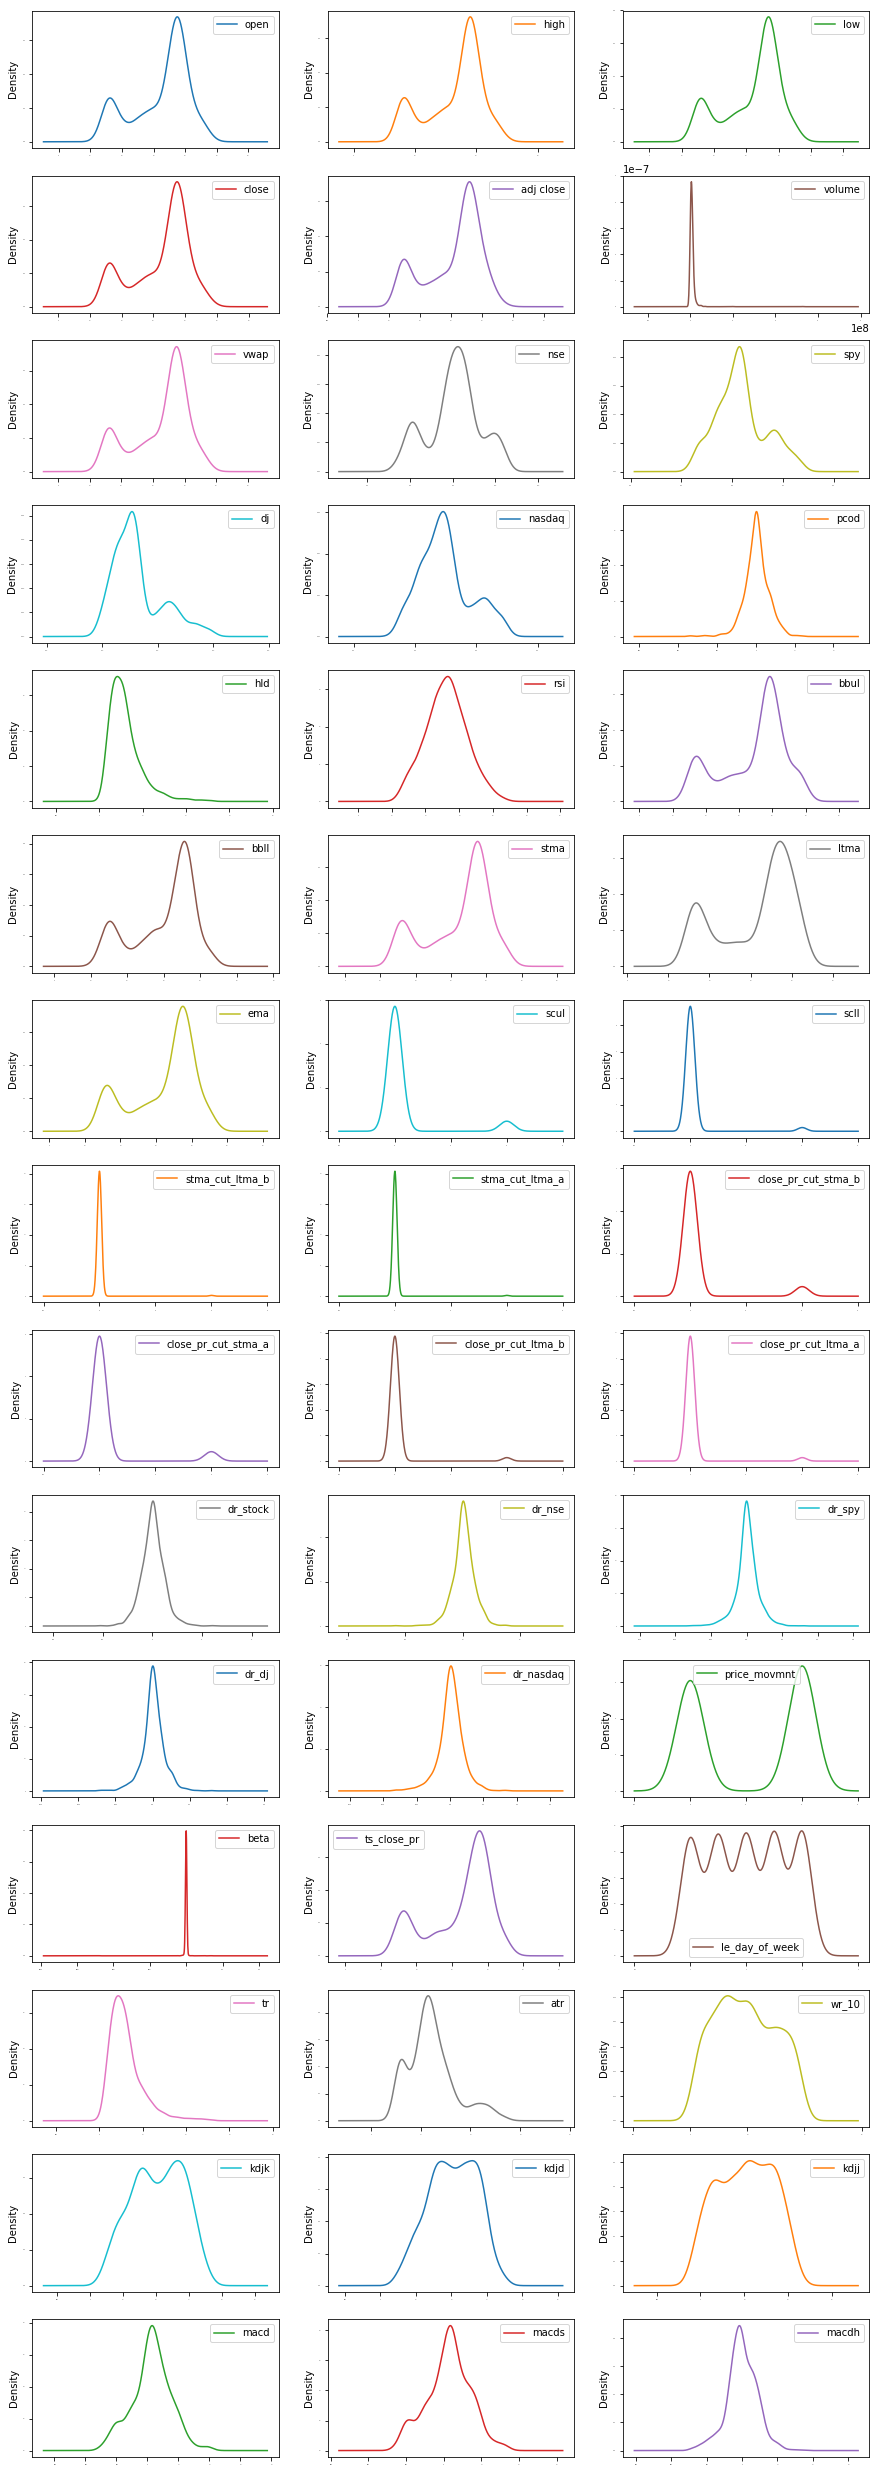

In [102]:
# density plots

temp_stock1.plot(kind='density', subplots=True, layout=(15,3), sharex=False, fontsize=1, figsize=(15,45))
plt.show()


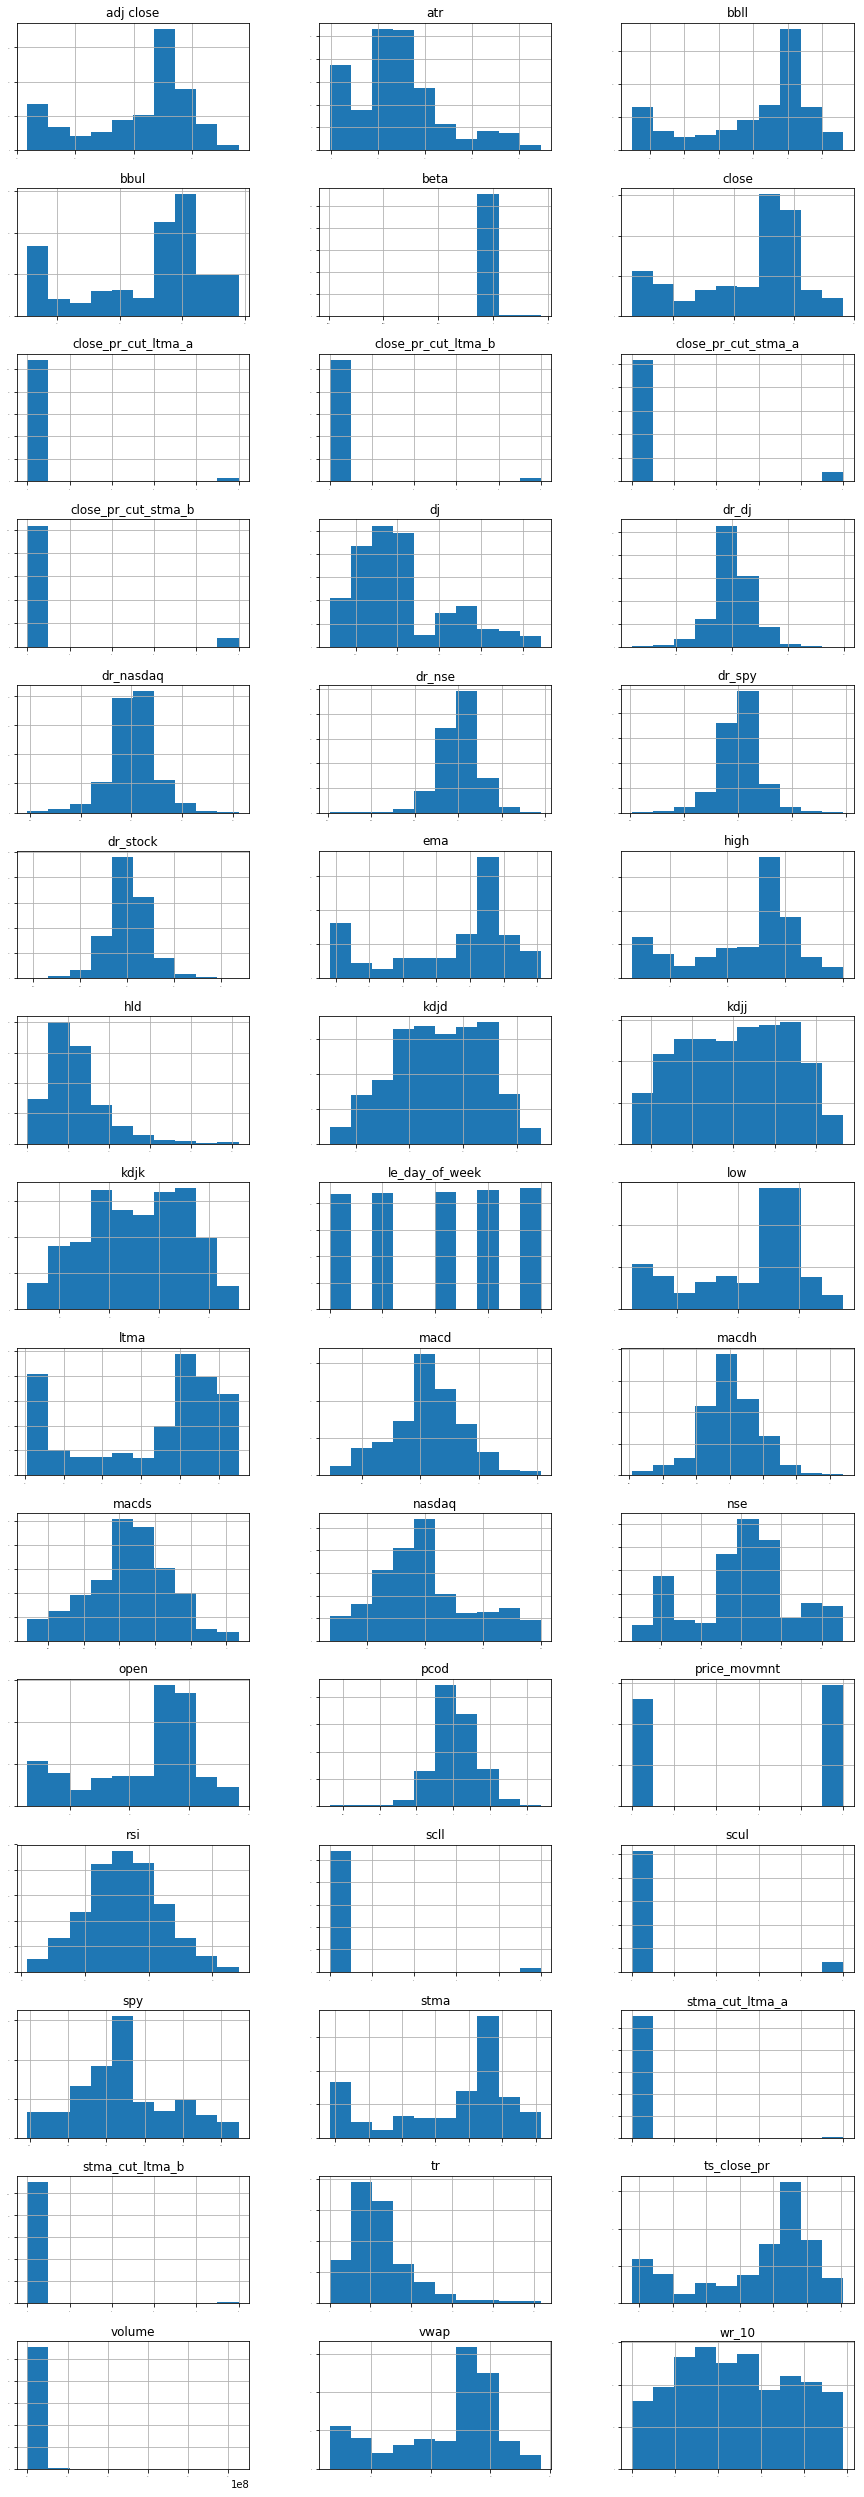

In [103]:
# histograms

temp_stock1.hist(layout=(15,3), sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,45))
plt.show()


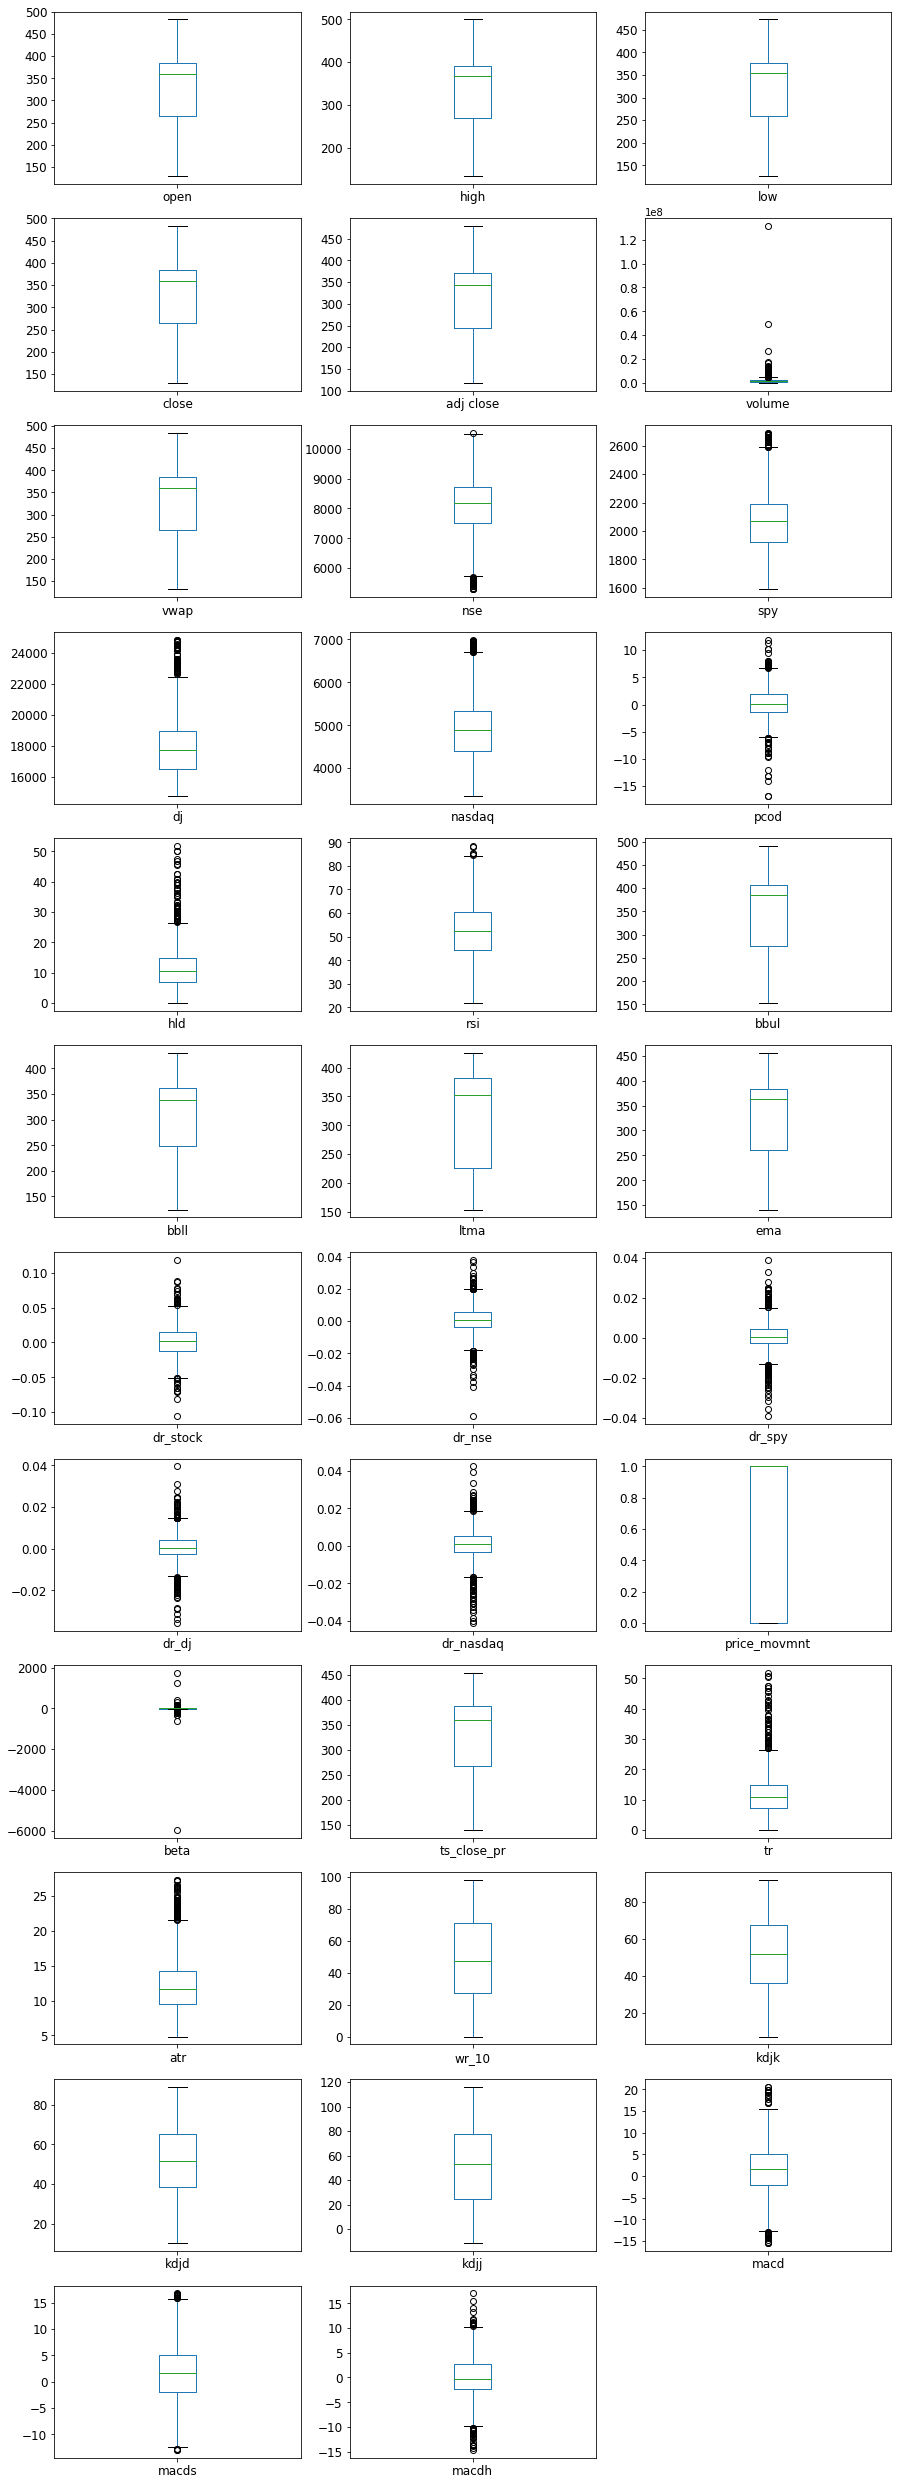

In [104]:
# Box and whisker plots

temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'ltma',
'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
'beta', 'ts_close_pr', 'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd',
'macds', 'macdh']].plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, fontsize=12, figsize=(15,45))
plt.show()


In [105]:
temp_stock1['scul'].value_counts()

0    1030
1      83
Name: scul, dtype: int64

In [106]:
temp_stock1['scll'].value_counts()

0    1081
1      32
Name: scll, dtype: int64

In [107]:
temp_stock1['stma_cut_ltma_b'].value_counts()

0    1106
1       7
Name: stma_cut_ltma_b, dtype: int64

In [108]:
temp_stock1['stma_cut_ltma_a'].value_counts()

0    1106
1       7
Name: stma_cut_ltma_a, dtype: int64

In [109]:
temp_stock1['close_pr_cut_stma_b'].value_counts()

0    1034
1      79
Name: close_pr_cut_stma_b, dtype: int64

In [110]:
temp_stock1['close_pr_cut_stma_a'].value_counts()

0    1035
1      78
Name: close_pr_cut_stma_a, dtype: int64

In [111]:
temp_stock1['close_pr_cut_ltma_b'].value_counts()

0    1083
1      30
Name: close_pr_cut_ltma_b, dtype: int64

In [112]:
temp_stock1['close_pr_cut_ltma_a'].value_counts()

0    1083
1      30
Name: close_pr_cut_ltma_a, dtype: int64

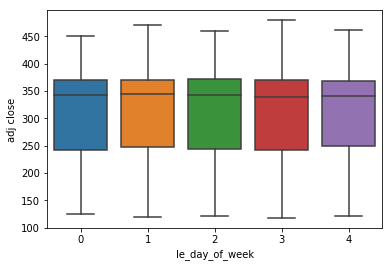

In [113]:
sns.boxplot(x="le_day_of_week", y="adj close", data=temp_stock1)

In [114]:
temp_stock1['price_movmnt'].value_counts()

1.0    591
0.0    522
Name: price_movmnt, dtype: int64

In [115]:
temp1 = temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'price_movmnt']] 
temp2 = temp_stock1[['volume', 'vwap', 'nse', 'spy', 'dj', 'price_movmnt']] 
temp3 = temp_stock1[['nasdaq', 'pcod', 'hld', 'rsi', 'stma', 'price_movmnt']] 
temp4 = temp_stock1[['ltma', 'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'price_movmnt']]  
temp5 = temp_stock1[['dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week', 'price_movmnt']] 
temp6 = temp_stock1[['tr', 'atr','wr_10', 'kdjk', 'kdjd', 'price_movmnt']]  
temp7 = temp_stock1[['kdjj', 'macd', 'macds', 'macdh', 'price_movmnt']] 

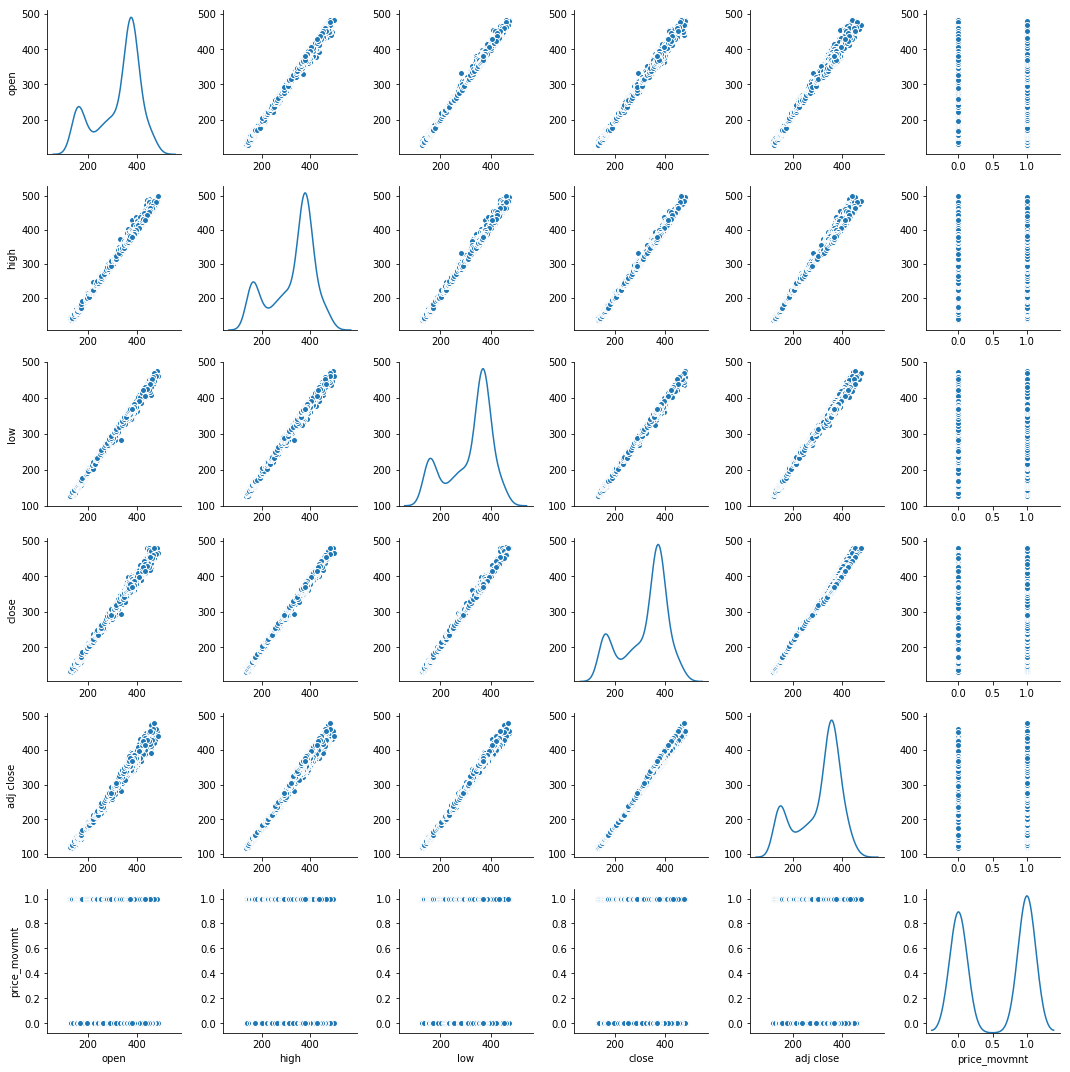

In [116]:
sns.pairplot(temp1, diag_kind='kde')

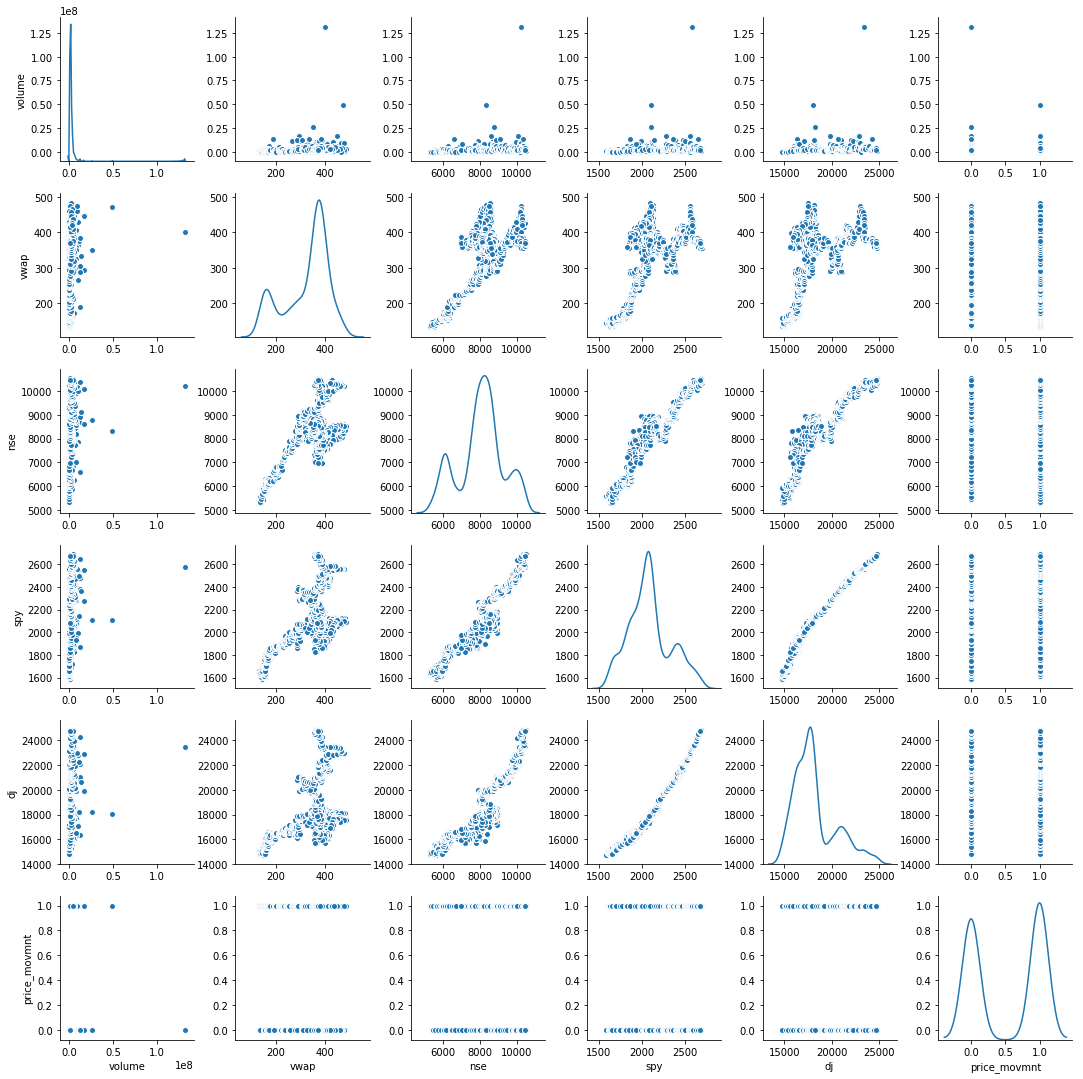

In [117]:
sns.pairplot(temp2, diag_kind='kde')

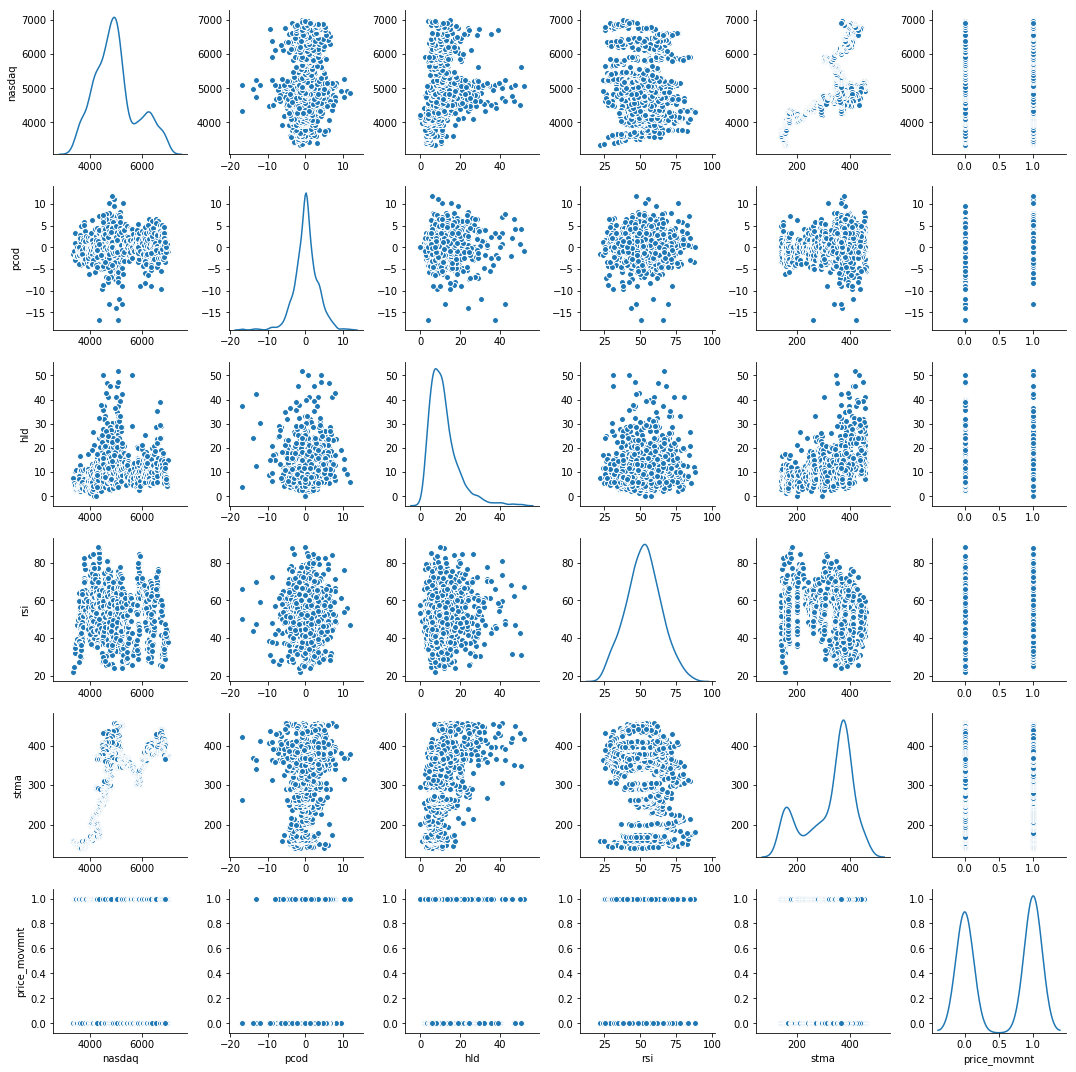

In [118]:
sns.pairplot(temp3, diag_kind='kde')

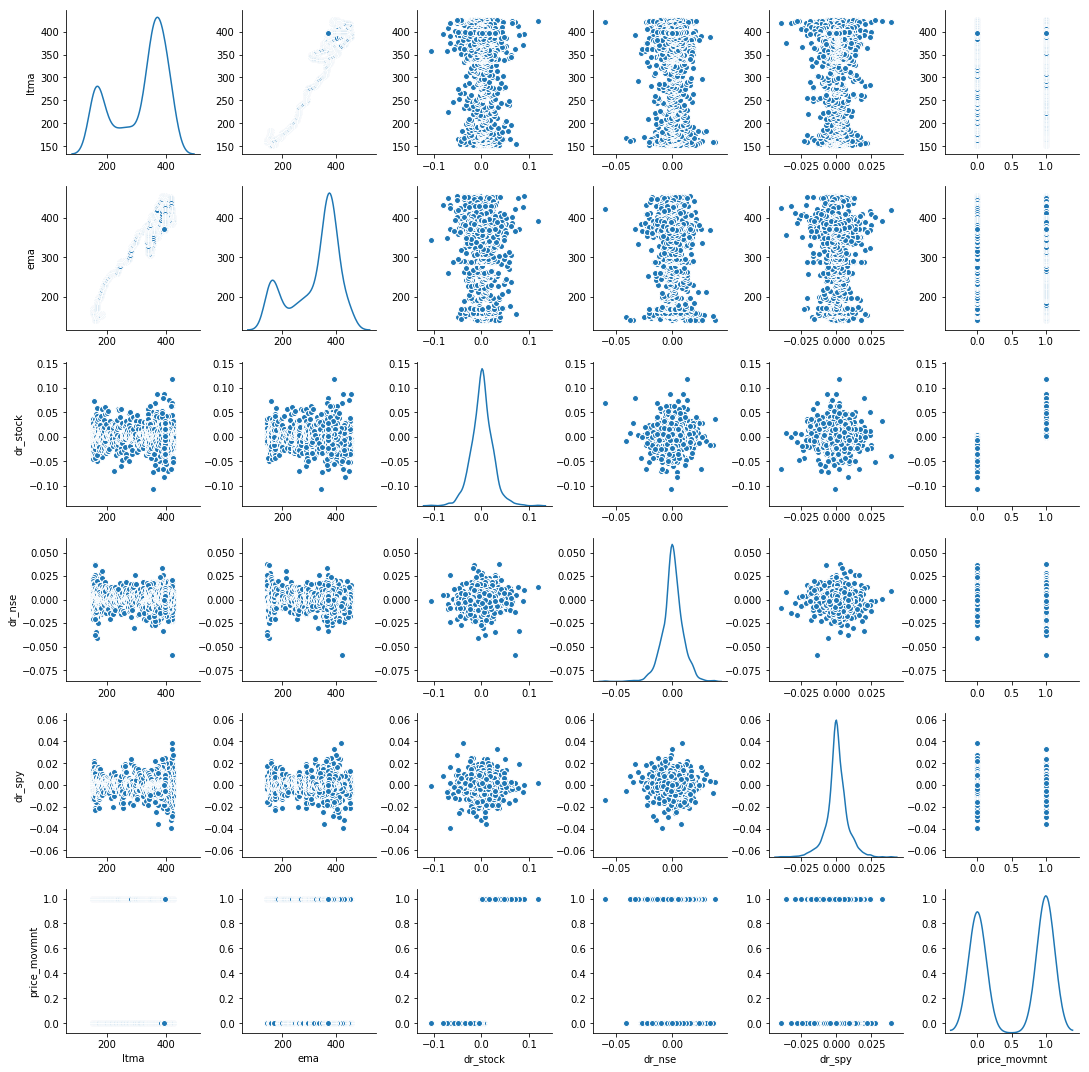

In [119]:
sns.pairplot(temp4, diag_kind='kde')

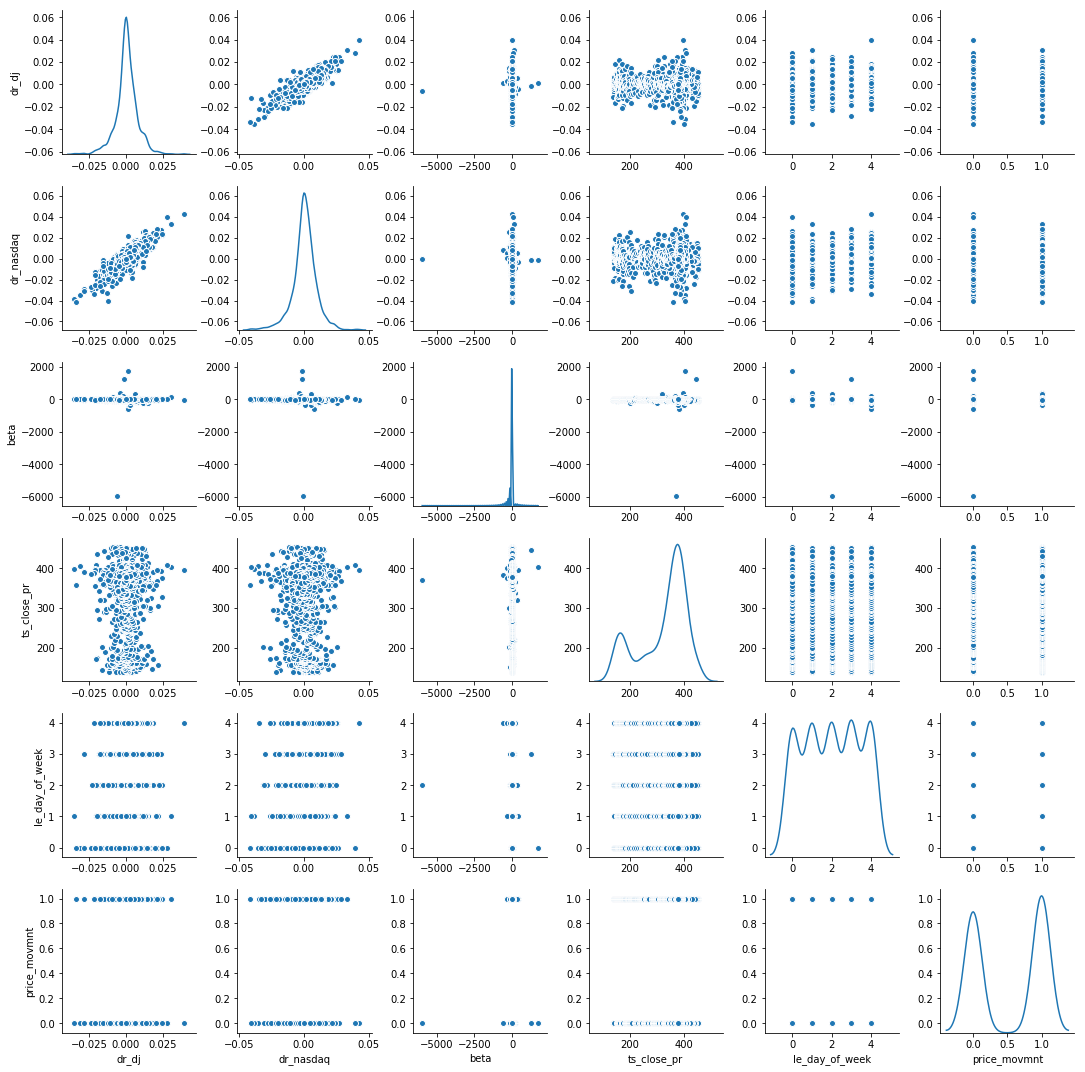

In [120]:
sns.pairplot(temp5, diag_kind='kde')

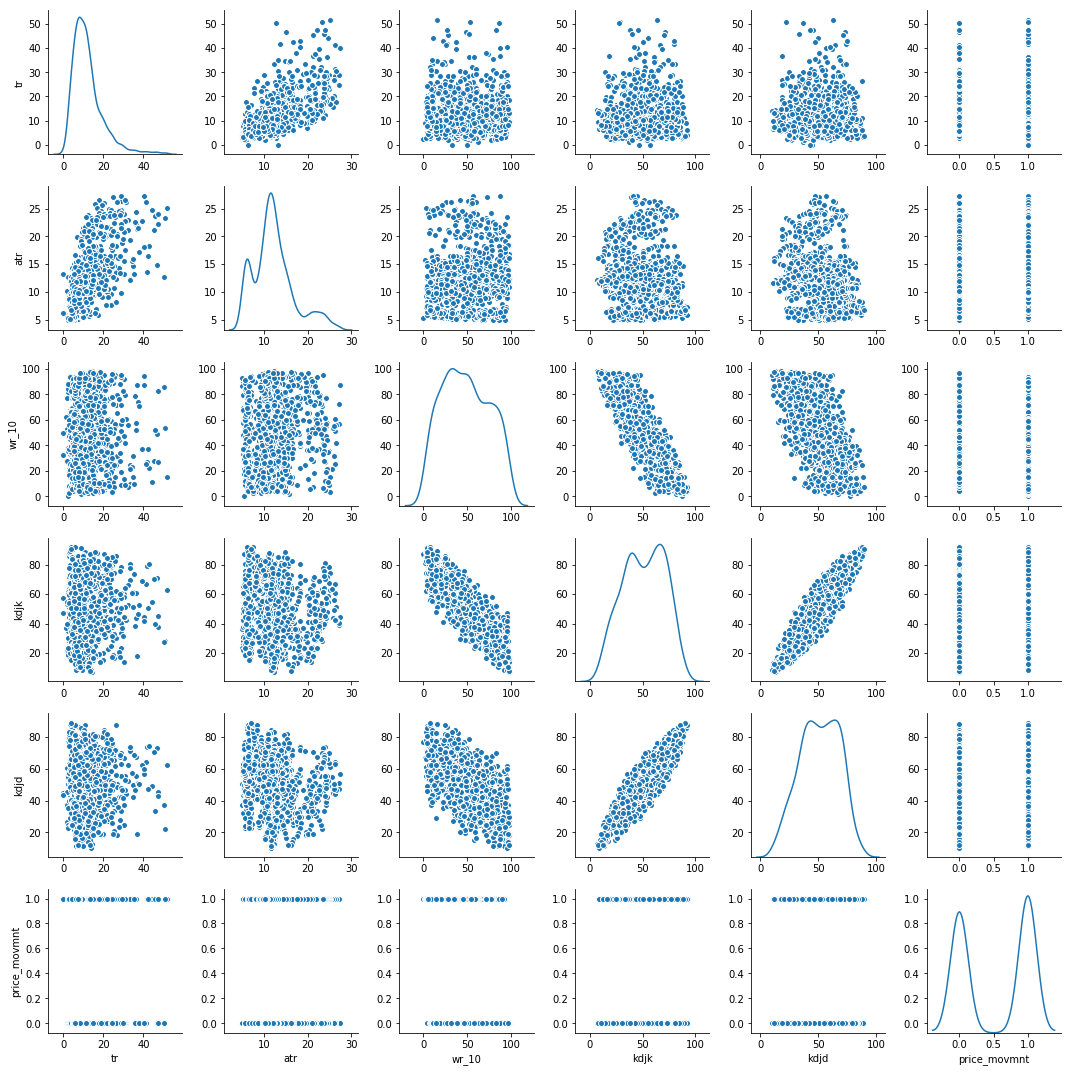

In [121]:
sns.pairplot(temp6, diag_kind='kde')

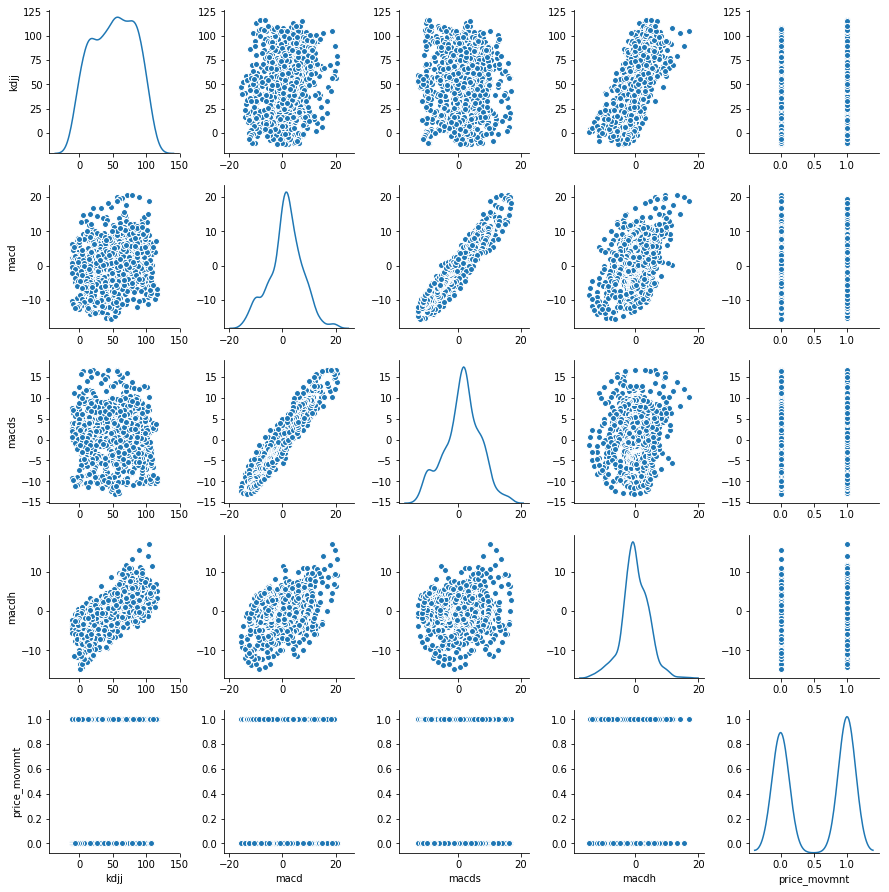

In [122]:
sns.pairplot(temp7, diag_kind='kde')

In [123]:
temp_stock1.head()

open        high         low       close   adj close  \
date                                                                     
2013-06-25  147.000000  147.699997  140.149994  142.350006  128.534073   
2013-06-26  141.500000  145.000000  139.399994  143.899994  129.933655   
2013-06-27  141.000000  151.500000  141.000000  148.899994  134.448364   
2013-06-28  152.149994  154.699997  151.600006  152.899994  138.060120   
2013-07-01  150.000000  154.500000  150.000000  153.050003  138.195572   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-06-25   899437  143.35  5590.250000  1588.030029  14760.309570    ...      
2013-06-26   277131  142.53  5609.100098  1603.260010  14910.139648    ...      
2013-06-27   513217  147.87  5588.700195  1613.199951  15024.490234    ...      
2013-06-28  1215038  152.23  5682.350098  1606.280029  14909.599609    ...      
2013-07-01   633345  153.07  5842.200195  1614.959961  14974.959961    ...      

            le_day_of_week         tr       atr      wr_10       kdjk  \
date                                                                    
2013-06-25               3   8.300003  6.972424  90.927786  21.699116   
2013-06-26               4   5.600006  6.874382  78.102193  21.765347   
2013-06-27               2  10.500000  7.133385  53.771296  29.919799   
2013-06-28               0   5.800003  7.038133  34.306579  43.630743   
2013-07-01               1   4.500000  6.856819  28.157847  53.034546   

                 kdjd       kdjj      macd     macds     macdh  
date                                                            
2013-06-25  22.826935  19.443479 -7.064138 -5.892184 -2.343907  
2013-06-26  22.473072  20.349895 -7.189779 -6.151703 -2.076152  
2013-06-27  24.955315  39.848768 -6.807449 -6.282852 -1.049193  
2013-06-28  31.180457  68.531315 -6.111257 -6.248533  0.274553  
2013-07-01  38.465154  82.173331 -5.484197 -6.095666  1.222938  

[5 rows x 45 columns]

In [124]:
temp_stock1.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr', 'le_day_of_week',
       'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'],
      dtype='object')

In [125]:
temp_stock1[['pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'scul', 'scll']].head(50)

pcod        hld        rsi     bbul     bbll        stma  \
date                                                                       
2013-06-25 -1.449997   7.550003  21.919078  178.040  139.130  158.585000   
2013-06-26 -0.850006   5.600006  24.603883  176.789  137.656  157.222500   
2013-06-27 -2.899994  10.500000  31.901815  175.188  137.192  156.189999   
2013-06-28  3.250000   3.099991  35.357719  173.110  137.510  155.309999   
2013-07-01 -2.899994   4.500000  36.833035  171.268  137.822  154.544999   
2013-07-02  0.949997   4.699997  34.688577  168.805  138.515  153.659999   
2013-07-03 -2.000000  10.649994  37.193564  166.199  139.606  152.902499   
2013-07-04 -1.949997   3.000000  37.288129  163.184  141.121  152.152499   
2013-07-05 -1.750000   5.000000  38.732386  160.656  142.369  151.512498   
2013-07-08  0.000000   3.500000  39.461878  158.400  143.450  150.924998   
2013-07-09 -1.949997   3.750000  46.808509  158.117  143.433  150.774998   
2013-07-10 -0.699997   3.550003  49.622431  158.087  143.428  150.757498   
2013-07-11  0.100006   4.000000  52.151646  158.429  143.296  150.862498   
2013-07-12 -1.850006   4.000000  52.102568  158.817  143.113  150.964999   
2013-07-15 -4.050003   4.000000  55.337685  159.505  142.915  151.209998   
2013-07-16 -1.250000   2.300003  56.698822  160.364  142.681  151.522498   
2013-07-17  1.800003   7.350006  49.893172  160.351  142.684  151.517499   
2013-07-18 -0.650009   4.199997  64.613377  160.564  143.586  152.074999   
2013-07-19 -0.900009   4.050003  60.349475  160.703  144.217  152.460000   
2013-07-22 -1.850006   5.899994  56.475306  160.732  144.673  152.702500   
2013-07-23 -0.199997   3.850006  63.800886  159.589  146.731  153.160000   
2013-07-24 -3.750000   5.199997  59.756101  158.436  148.524  153.480000   
2013-07-25 -2.199997   2.949997  50.344848  158.408  148.572  153.490001   
2013-07-26 -0.100006   5.000000  44.615414  158.493  148.207  153.350001   
2013-07-29 -1.100006  10.250000  37.055026  159.295  146.605  152.950001   
2013-07-30  2.800003   4.000000  46.198823  159.351  146.289  152.820001   
2013-07-31 -1.899994   9.000000  42.161350  159.308  145.817  152.562501   
2013-08-01 -1.500000   5.149994  41.906198  159.263  145.327  152.295001   
2013-08-02  1.500000   4.000000  44.254668  159.250  144.970  152.110001   
2013-08-05 -0.699997   3.399994  48.346453  159.248  144.867  152.057501   
2013-08-06 -1.799988   4.899994  43.732203  159.435  144.240  151.837501   
2013-08-07 -0.350006   6.799988  43.083593  159.485  143.710  151.597502   
2013-08-08  0.849991   6.750000  41.654342  158.962  143.668  151.315002   
2013-08-12 -1.199997   6.250000  40.422312  158.153  143.842  150.997501   
2013-08-13 -1.949997   4.899994  39.469812  157.225  144.055  150.640002   
2013-08-14 -0.800003   3.299988  38.009047  155.828  144.657  150.242502   
2013-08-16 -1.100006   3.449997  41.999991  155.159  144.846  150.002502   
2013-08-19 -1.649994   2.949997  37.792629  153.940  145.335  149.637501   
2013-08-20 -0.949997   4.300003  36.392890  152.989  145.441  149.215001   
2013-08-21  1.600006  12.899994  30.706512  153.996  143.014  148.505001   
2013-08-22 -1.750000   6.850006  34.710718  154.337  141.563  147.950001   
2013-08-23 -1.399994   4.000000  33.825480  154.957  139.738  147.347501   
2013-08-26  1.050003  11.000000  29.999975  156.605  136.410  146.507500   
2013-08-27 -0.300003   7.650001  27.198091  157.709  133.361  145.535000   
2013-08-28 -1.649994  16.500000  36.893190  158.176  131.814  144.995000   
2013-08-29  2.250000   6.699997  30.388215  158.028  130.497  144.262500   
2013-08-30 -1.800003   8.500000  38.349502  157.551  130.014  143.782500   
2013-09-02  0.000000   6.949997  38.256655  157.065  129.530  143.297500   
2013-09-03 -0.949997   2.800003  36.536162  156.478  128.982  142.730000   
2013-09-04 -1.099991   3.449997  36.309514  155.599  128.711  142.155000   

                  ltma         ema  scul  scll  
date          

In [126]:
temp_stock1[['stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].head(50)

stma_cut_ltma_b  stma_cut_ltma_a  close_pr_cut_stma_b  \
date                                                                
2013-06-25                0                0                    0   
2013-06-26                0                0                    0   
2013-06-27                0                0                    0   
2013-06-28                0                0                    0   
2013-07-01                0                0                    0   
2013-07-02                0                0                    0   
2013-07-03                0                0                    1   
2013-07-04                0                0                    0   
2013-07-05                0                0                    0   
2013-07-08                0                0                    0   
2013-07-09                0                0                    0   
2013-07-10                0                0                    0   
2013-07-11                0                0                    0   
2013-07-12                0                0                    0   
2013-07-15                0                0                    0   
2013-07-16                0                0                    0   
2013-07-17                0                0                    0   
2013-07-18                0                0                    0   
2013-07-19                0                0                    0   
2013-07-22                0                0                    0   
2013-07-23                0                0                    0   
2013-07-24                0                0                    0   
2013-07-25                0                0                    0   
2013-07-26                0                0                    0   
2013-07-29                0                0                    0   
2013-07-30                0                0                    0   
2013-07-31                0                0                    0   
2013-08-01                0                0                    0   
2013-08-02                0                0                    0   
2013-08-05                0                0                    0   
2013-08-06                0                0                    0   
2013-08-07                0                0                    0   
2013-08-08                0                0                    0   
2013-08-12                0                0                    0   
2013-08-13                0                0                    0   
2013-08-14                0                0                    0   
2013-08-16                0                0                    0   
2013-08-19                0                0                    0   
2013-08-20                0                0                    0   
2013-08-21                0                0                    0   
2013-08-22                0                0                    0   
2013-08-23                0                0                    0   
2013-08-26                0                0                    0   
2013-08-27                0                0                    0   
2013-08-28                0                0                    0   
2013-08-29                0                0                    0   
2013-08-30                0                0                    0   
2013-09-02                0                0                    0   
2013-09-03                0                0                    0   
2013-09-04                0                0                    0   

            close_pr_cut_stma_a  close_pr_cut_ltma_b  close_pr_cut_ltma_a  
date                                                                       
2013-06-25                    0                    0                    0  
2013-06-26                    0                    0                    0  
2013-06-27                    0                    0                    0  
2013-06-28                    0            

In [127]:
temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr']].head(50)

dr_stock    dr_nse    dr_spy     dr_dj  dr_nasdaq  price_movmnt  \
date                                                                          
2013-06-25 -0.041091 -0.013656  0.009497  0.006873   0.008170           0.0   
2013-06-26  0.010889  0.003372  0.009590  0.010151   0.008462           1.0   
2013-06-27  0.034746 -0.003637  0.006200  0.007669   0.007594           1.0   
2013-06-28  0.026864  0.016757 -0.004290 -0.007647   0.000409           1.0   
2013-07-01  0.000981  0.028131  0.005404  0.004384   0.009179           1.0   
2013-07-02 -0.006860  0.009697 -0.000545 -0.002841  -0.000317           0.0   
2013-07-03  0.012829 -0.007001  0.000824  0.003748   0.002991           1.0   
2013-07-04 -0.001299 -0.014793  0.000000  0.000000   0.000000           0.0   
2013-07-05 -0.008130  0.011445  0.010202  0.009839   0.010370           0.0   
2013-07-08 -0.010164  0.005302  0.005252  0.005870   0.001566           0.0   
2013-07-09 -0.000331 -0.009603  0.007230  0.004969   0.005576           0.0   
2013-07-10  0.006627  0.008165  0.000182 -0.000567   0.004709           1.0   
2013-07-11  0.026004 -0.007220  0.013554  0.011069   0.016343           1.0   
2013-07-12  0.007700  0.020355  0.003086  0.000219   0.006087           1.0   
2013-07-15 -0.000318  0.012451  0.001375  0.001291   0.002058           0.0   
2013-07-16  0.006688  0.003628 -0.003709 -0.002093  -0.002492           1.0   
2013-07-17 -0.020563 -0.012527  0.002774  0.001208   0.003196           0.0   
2013-07-18  0.008398  0.003031  0.005033  0.005043   0.000355           1.0   
2013-07-19 -0.008008  0.010840  0.001610 -0.000309  -0.006554           0.0   
2013-07-22 -0.010010 -0.001466  0.002033  0.000116   0.003562           0.0   
2013-07-23 -0.011742  0.000431 -0.001852  0.001427  -0.005866           0.0   
2013-07-24 -0.007921  0.007626 -0.003811 -0.001638   0.000092           0.0   
2013-07-25 -0.007984 -0.014364  0.002556  0.000860   0.007149           0.0   
2013-07-26  0.006707 -0.013855  0.000828  0.000207   0.002211           1.0   
2013-07-29 -0.033644 -0.003606 -0.003736 -0.002369  -0.003880           0.0   
2013-07-30  0.029989 -0.009267  0.000374 -0.000089   0.004815           1.0   
2013-07-31 -0.004016 -0.013135 -0.000136 -0.001356   0.002738           0.0   
2013-08-01 -0.002688 -0.002268  0.012541  0.008289   0.013614           0.0   
2013-08-02  0.002696 -0.002464  0.001640  0.001941   0.003768           1.0   
2013-08-05  0.007392 -0.008721 -0.001480 -0.002952   0.000911           1.0   
2013-08-06 -0.022682  0.001321 -0.005723 -0.005982  -0.007360           0.0   
2013-08-07  0.004096 -0.025179 -0.003806 -0.003098  -0.003208           1.0   
2013-08-08  0.021074 -0.004177  0.003885  0.001787   0.004135           1.0   
2013-08-12  0.003329  0.008434 -0.004719 -0.005074   0.000226           1.0   
2013-08-13 -0.005640  0.008400  0.002776  0.002032   0.003948           0.0   
2013-08-14  0.001668  0.015484 -0.005177 -0.007336  -0.004117           1.0   
2013-08-16 -0.000666  0.007545 -0.017539 -0.016703  -0.018121           0.0   
2013-08-19 -0.008000 -0.040829 -0.005900 -0.004690  -0.003800           0.0   
2013-08-20 -0.016129 -0.016903  0.003821 -0.000516   0.006826           0.0   
2013-08-21 -0.049863 -0.002456 -0.005780 -0.007028  -0.003819           0.0   
2013-08-22  0.009346 -0.018310  0.008619  0.004443   0.010812           1.0   
2013-08-23 -0.015313  0.019972  0.003947  0.003126   0.005244           0.0   
2013-08-26 -0.043038  0.011704 -0.004040 -0.004267  -0.000060           0.0   
2013-08-27 -0.012472  0.000868 -0.015874 -0.011396  -0.021613           0.0   
2013-08-28  0.027555 -0.034520  0.002748  0.003274   0.004144           1.0   
2013-08-29  0.003724 -0.000463  0.001963  0.001109   0.007500           1.0   
2013-08-30  0.033024  0.023472 -0.003174 -0.002065  -0.008405           1.0   
2013-09-02 -0.003592  0.011601  0.000000  0.000000   0.000000           0.0   
2013-09-03 -0.009012  0.014429  0.004164  0.001597   0.006334 

In [128]:
temp_stock1[['le_day_of_week', 'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].head(50)

le_day_of_week         tr       atr      wr_10       kdjk  \
date                                                                    
2013-06-25               3   8.300003  6.972424  90.927786  21.699116   
2013-06-26               4   5.600006  6.874382  78.102193  21.765347   
2013-06-27               2  10.500000  7.133385  53.771296  29.919799   
2013-06-28               0   5.800003  7.038133  34.306579  43.630743   
2013-07-01               1   4.500000  6.856819  28.157847  53.034546   
2013-07-02               3   4.699997  6.702746  33.684179  62.807352   
2013-07-03               4  10.649994  6.984717  20.273956  68.446916   
2013-07-04               2   3.000000  6.700071  21.369830  71.841334   
2013-07-05               0   5.000000  6.578628  28.219145  71.821174   
2013-07-08               1   3.500000  6.358711  36.712312  68.976679   
2013-07-09               3   3.750000  6.172362  36.986301  65.804267   
2013-07-10               4   3.550003  5.985039  34.534547  59.205965   
2013-07-11               2   4.100006  5.850386  16.901305  67.170208   
2013-07-12               0   4.000000  5.718209   8.636336  75.234693   
2013-07-15               1   4.050003  5.599046   9.090909  80.459492   
2013-07-16               3   2.300003  5.363389   0.000000  86.972995   
2013-07-17               4   7.350006  5.505296  46.543781  75.800736   
2013-07-18               2   4.199997  5.412057  34.562193  72.346427   
2013-07-19               0   4.050003  5.314764  46.082924  66.203310   
2013-07-22               1   5.899994  5.356567  60.368658  56.475292   
2013-07-23               3   3.850006  5.248953  80.288450  44.220711   
2013-07-24               4   5.199997  5.245456  78.925605  36.505272   
2013-07-25               2   2.949997  5.081490  88.842931  28.055871   
2013-07-26               0   5.000000  5.075669  80.578472  25.177757   
2013-07-29               1  10.250000  5.445273  81.767945  22.862523   
2013-07-30               3   4.949997  5.409895  57.734854  31.962980   
2013-07-31               4   9.000000  5.666336  53.770472  37.684960   
2013-08-01               2   5.149994  5.629454  53.658598  40.678848   
2013-08-02               0   4.000000  5.513062  50.526295  46.302914   
2013-08-05               1   3.399994  5.362127  33.469437  53.045464   
2013-08-06               3   4.899994  5.329117  61.224490  48.288812   
2013-08-07               4   6.799988  5.434180  56.326482  46.750381   
2013-08-08               2   6.750000  5.528169  31.020433  54.160110   
2013-08-12               1   6.250000  5.579729  26.938800  59.348315   
2013-08-13               3   4.899994  5.531176  38.073360  60.207757   
2013-08-14               4   3.299988  5.371803  35.779781  61.843931   
2013-08-16               0   3.449997  5.234530  35.814009  62.624617   
2013-08-19               1   3.000000  5.074920  46.976772  59.424154   
2013-08-20               3   4.300003  5.019568  69.302437  49.848624   
2013-08-21               4  12.899994  5.582460  78.666667  40.343527   
2013-08-22               2   6.850006  5.672999  71.733397  36.317886   
2013-08-23               0   4.399994  5.582070  83.200032  29.918436   
2013-08-26               1  11.000000  5.969067  84.799988  25.335699   
2013-08-27               3   7.650001  6.089135  85.915524  21.701453   
2013-08-28               4  16.500000  6.832772  68.875495  25.011853   
2013-08-29               2   6.699997  6.823288  66.326531  28.401649   
2013-08-30               0   8.500000  6.943054  45.842223  37.917983   
2013-09-02               1   6.949997  6.943549  45.291501  44.193380   
2013-09-03               3   2.949997  6.658295  49.069781  51.583459   
2013-09-04               4   3.449997  6.429130  27.878824  58.429365   

                 kdjd        kdjj      macd     macds     macdh  
date                                                             
2013-06-25  22.826935   19.443479 -7.064138 -5.892184 -2.343907  
2013-06-26  22.47

In [129]:
# Variables for outliers treatment
vars_outlier_trtmnt = ['volume', 'pcod', 'hld', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
                       'dr_nasdaq', 'beta', 'tr', 'atr','macd', 'macds', 'macdh']

# Variables which can possibly take negative values
# 'pcod', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta','macd', 'macds', 'macdh'

### Outliers treatment for Stock-1

In [130]:
# Outliers treatment 

def outliers_treatment(name, df):
    print('\nIndependent variable =', name)
    print('Possible LOWER and UPPER boudaries for "{}" variable (below or above which are capped and floored to the statistical boundaries)'.format(name))
    
    temp_set = set(df[name])
    # Using the feature 'nan != nan' to remove 'nan' from the set
    temp_set = {x for x in temp_set if x==x}        
    minimum = min(temp_set)
    maximum = max(temp_set)
    print('minimum value other than "nan" = ', minimum)
    print('maximum value other than "nan" = ', maximum)
    
    # 'nan' will be replaced by next 'minimum' value(other than 'nan')
    df[name].fillna(minimum, inplace=True)
    
    q95, q75, q25, q5 = np.percentile(df[name], [95, 75, 25, 5])
    print('q95, q75, q25, q5 values:', q95, q75, q25, q5)
    iqr = q75 - q25
    stat_min_val = q25 - 1.5 * iqr
    stat_max_val = q75 + 1.5 * iqr   
  
    # Capping and Flooring
     
    if (stat_min_val < q5): # capping to 5th percentile value
        stat_min_val = q5 
        
    if (stat_max_val > q95): # flooring to 95th percentile value 
        stat_max_val = q95          
    
    # To handle negative values in the variables
    if (name == 'pcod' or name == 'dr_stock' or name == 'dr_nse' or name == 'dr_spy' or name == 'dr_dj' 
        or name == 'dr_nasdaq' or name == 'beta' or name == 'macd' or name == 'macds' or name == 'macdh'):    
        if (stat_min_val < 0):           
            pass            
    else: # for other variables which cannot take negative values
        if (stat_min_val < 0):
            if (q5 > 0):
                stat_min_val = q5
            else:
                stat_min_val = 0
            
    print('stat_min_val =', stat_min_val)
    print('stat_max_val =', stat_max_val, '\n')       
    
    new_col = pd.DataFrame()
    new_col = df[[name]]
    new_col[new_col[name] > stat_max_val] = stat_max_val
    new_col[new_col[name] < stat_min_val] = stat_min_val
    df[name] = new_col[name]
       
    return df 

name = ''   
#for idx, name in enumerate(vars_outlier_trtmnt):
    #new_df = pd.DataFrame()
    #new_df = outliers_treatment(name, temp_stock1)    
    #temp_stock1 = new_df


### Feature Selection for Stock-1

In [131]:
temp_stock1.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr', 'le_day_of_week',
       'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'],
      dtype='object')

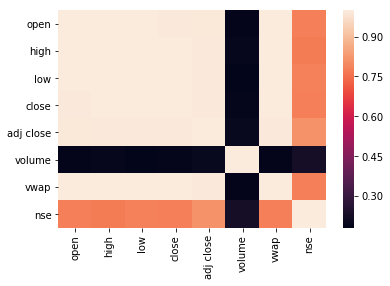

In [132]:
sns.heatmap(temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr())

In [133]:
abs(temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr()) > 0.7

open   high    low  close  adj close  volume   vwap    nse
open        True   True   True   True       True   False   True   True
high        True   True   True   True       True   False   True   True
low         True   True   True   True       True   False   True   True
close       True   True   True   True       True   False   True   True
adj close   True   True   True   True       True   False   True   True
volume     False  False  False  False      False    True  False  False
vwap        True   True   True   True       True   False   True   True
nse         True   True   True   True       True   False   True   True

##### There is very high multi-collinearity among the variables 'open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse'. So these are the candidates for PCA.

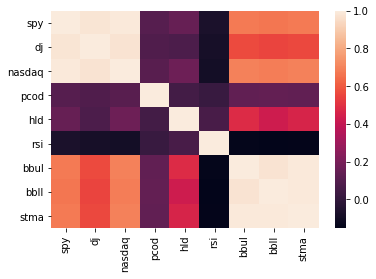

In [134]:
sns.heatmap(temp_stock1[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr())

In [135]:
abs(temp_stock1[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr()) > 0.7

spy     dj  nasdaq   pcod    hld    rsi   bbul   bbll   stma
spy      True   True    True  False  False  False  False  False  False
dj       True   True    True  False  False  False  False  False  False
nasdaq   True   True    True  False  False  False  False  False  False
pcod    False  False   False   True  False  False  False  False  False
hld     False  False   False  False   True  False  False  False  False
rsi     False  False   False  False  False   True  False  False  False
bbul    False  False   False  False  False  False   True   True   True
bbll    False  False   False  False  False  False   True   True   True
stma    False  False   False  False  False  False   True   True   True

##### There is very high multi-collinearity among the variables 'spy', 'dj', 'nasdaq', 'bbul', 'bbll', 'stma'.  So these are the candidates for PCA.

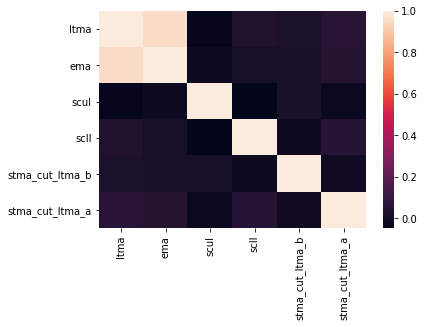

In [136]:
sns.heatmap(temp_stock1[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr())

In [137]:
abs(temp_stock1[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr()) > 0.7

ltma    ema   scul   scll  stma_cut_ltma_b  stma_cut_ltma_a
ltma              True   True  False  False            False            False
ema               True   True  False  False            False            False
scul             False  False   True  False            False            False
scll             False  False  False   True            False            False
stma_cut_ltma_b  False  False  False  False             True            False
stma_cut_ltma_a  False  False  False  False            False             True

##### There is very high multi-collinearity among the variables 'ltma', 'ema'.  So these are the candidates for PCA.

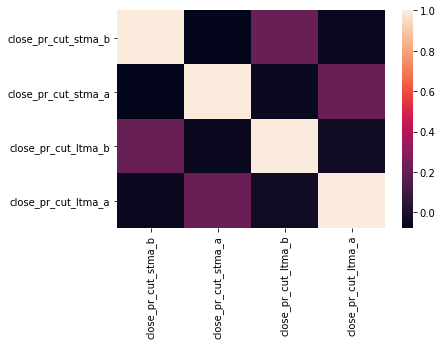

In [138]:
sns.heatmap(temp_stock1[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr())

In [139]:
abs(temp_stock1[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr()) > 0.7

close_pr_cut_stma_b  close_pr_cut_stma_a  \
close_pr_cut_stma_b                 True                False   
close_pr_cut_stma_a                False                 True   
close_pr_cut_ltma_b                False                False   
close_pr_cut_ltma_a                False                False   

                     close_pr_cut_ltma_b  close_pr_cut_ltma_a  
close_pr_cut_stma_b                False                False  
close_pr_cut_stma_a                False                False  
close_pr_cut_ltma_b                 True                False  
close_pr_cut_ltma_a                False                 True

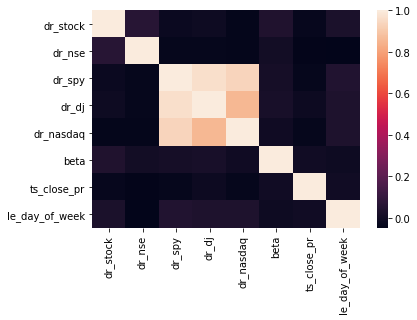

In [140]:
sns.heatmap(temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr())

In [141]:
abs(temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr()) > 0.7

dr_stock  dr_nse  dr_spy  dr_dj  dr_nasdaq   beta  \
dr_stock            True   False   False  False      False  False   
dr_nse             False    True   False  False      False  False   
dr_spy             False   False    True   True       True  False   
dr_dj              False   False    True   True       True  False   
dr_nasdaq          False   False    True   True       True  False   
beta               False   False   False  False      False   True   
ts_close_pr        False   False   False  False      False  False   
le_day_of_week     False   False   False  False      False  False   

                ts_close_pr  le_day_of_week  
dr_stock              False           False  
dr_nse                False           False  
dr_spy                False           False  
dr_dj                 False           False  
dr_nasdaq             False           False  
beta                  False           False  
ts_close_pr            True           False  
le_day_of_week        False            True

##### There is very high multi-collinearity among the variables 'dr_spy', 'dr_dj', 'dr_nasdaq'.  So these are the candidates for PCA.

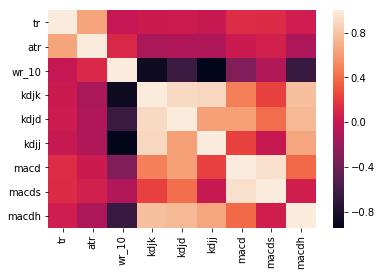

In [142]:
sns.heatmap(temp_stock1[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr())

In [143]:
abs(temp_stock1[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr()) > 0.7

tr    atr  wr_10   kdjk   kdjd   kdjj   macd  macds  macdh
tr      True  False  False  False  False  False  False  False  False
atr    False   True  False  False  False  False  False  False  False
wr_10  False  False   True   True  False   True  False  False  False
kdjk   False  False   True   True   True   True  False  False   True
kdjd   False  False  False   True   True  False  False  False   True
kdjj   False  False   True   True  False   True  False  False  False
macd   False  False  False  False  False  False   True   True  False
macds  False  False  False  False  False  False   True   True  False
macdh  False  False  False   True   True  False  False  False   True

##### There is very high multi-collinearity among the variables 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'. So these are the candidates for PCA.

### Data preparation for PCA
Variables for PCA: 'open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse', 'spy', 'dj', 'nasdaq', 'bbul', 'bbll', 'stma',
'ltma', 'ema', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'

In [144]:
y = temp_stock1['price_movmnt']
X = temp_stock1.drop(['price_movmnt'], axis=1)

In [145]:
vars_pca = ['open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse', 'spy', 'dj',         
         'nasdaq', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'dr_spy', 'dr_dj', 
         'dr_nasdaq', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']

In [146]:
pca_X = temp_stock1[vars_pca]
print('pca_X.shape', pca_X.shape)
pca_X.head()


pca_X.shape (1113, 25)


open        high         low       close   adj close  \
date                                                                     
2013-06-25  147.000000  147.699997  140.149994  142.350006  128.534073   
2013-06-26  141.500000  145.000000  139.399994  143.899994  129.933655   
2013-06-27  141.000000  151.500000  141.000000  148.899994  134.448364   
2013-06-28  152.149994  154.699997  151.600006  152.899994  138.060120   
2013-07-01  150.000000  154.500000  150.000000  153.050003  138.195572   

              vwap          nse          spy            dj       nasdaq  \
date                                                                      
2013-06-25  143.35  5590.250000  1588.030029  14760.309570  3347.889893   
2013-06-26  142.53  5609.100098  1603.260010  14910.139648  3376.219971   
2013-06-27  147.87  5588.700195  1613.199951  15024.490234  3401.860107   
2013-06-28  152.23  5682.350098  1606.280029  14909.599609  3403.250000   
2013-07-01  153.07  5842.200195  1614.959961  14974.959961  3434.489990   

              ...       dr_spy     dr_dj  dr_nasdaq      wr_10       kdjk  \
date          ...                                                           
2013-06-25    ...     0.009497  0.006873   0.008170  90.927786  21.699116   
2013-06-26    ...     0.009590  0.010151   0.008462  78.102193  21.765347   
2013-06-27    ...     0.006200  0.007669   0.007594  53.771296  29.919799   
2013-06-28    ...    -0.004290 -0.007647   0.000409  34.306579  43.630743   
2013-07-01    ...     0.005404  0.004384   0.009179  28.157847  53.034546   

                 kdjd       kdjj      macd     macds     macdh  
date                                                            
2013-06-25  22.826935  19.443479 -7.064138 -5.892184 -2.343907  
2013-06-26  22.473072  20.349895 -7.189779 -6.151703 -2.076152  
2013-06-27  24.955315  39.848768 -6.807449 -6.282852 -1.049193  
2013-06-28  31.180457  68.531315 -6.111257 -6.248533  0.274553  
2013-07-01  38.465154  82.173331 -5.484197 -6.095666  1.222938  

[5 rows x 25 columns]

In [147]:
# Standardise the data of independent variables and then create PCA dimensions on this distribution

pca_X_std = StandardScaler().fit_transform(pca_X)
print(pca_X_std.shape)
pca_X_std


(1113, 25)


array([[-1.97239589, -1.99952977, -2.03150243, ..., -1.34195218,
        -1.25343122, -0.54404339],
       [-2.03341682, -2.02901049, -2.04002625, ..., -1.36203629,
        -1.29841549, -0.48145743],
       [-2.03896418, -1.9580383 , -2.02184203, ..., -1.30091982,
        -1.32114849, -0.2414125 ],
       ...,
       [ 0.47398851,  0.44737287,  0.51825645, ..., -1.34316401,
        -1.85596139,  1.07742518],
       [ 0.49839701,  0.54291236,  0.54780576, ..., -1.09852193,
        -1.72329093,  1.43506841],
       [ 0.61156289,  0.5358152 ,  0.56201213, ..., -1.00897169,
        -1.59773369,  1.35833154]])

In [148]:
other_X = X.drop(pca_X.columns.tolist(), axis=1)
print('other_X.shape', other_X.shape)
other_X.head()


other_X.shape (1113, 19)


volume      pcod        hld        rsi  scul  scll  \
date                                                              
2013-06-25   899437 -1.449997   7.550003  21.919078     0     0   
2013-06-26   277131 -0.850006   5.600006  24.603883     0     0   
2013-06-27   513217 -2.899994  10.500000  31.901815     0     0   
2013-06-28  1215038  3.250000   3.099991  35.357719     0     0   
2013-07-01   633345 -2.899994   4.500000  36.833035     0     0   

            stma_cut_ltma_b  stma_cut_ltma_a  close_pr_cut_stma_b  \
date                                                                
2013-06-25                0                0                    0   
2013-06-26                0                0                    0   
2013-06-27                0                0                    0   
2013-06-28                0                0                    0   
2013-07-01                0                0                    0   

            close_pr_cut_stma_a  close_pr_cut_ltma_b  close_pr_cut_ltma_a  \
date                                                                        
2013-06-25                    0                    0                    0   
2013-06-26                    0                    0                    0   
2013-06-27                    0                    0                    0   
2013-06-28                    0                    0                    0   
2013-07-01                    0                    0                    0   

            dr_stock    dr_nse      beta  ts_close_pr  le_day_of_week  \
date                                                                    
2013-06-25 -0.041091 -0.013656  3.008918   153.083084               3   
2013-06-26  0.010889  0.003372  3.229220   153.227005               4   
2013-06-27  0.034746 -0.003637 -9.553735   153.321433               2   
2013-06-28  0.026864  0.016757  1.603121   153.077283               0   
2013-07-01  0.000981  0.028131  0.034876   153.338646               1   

                   tr       atr  
date                             
2013-06-25   8.300003  6.972424  
2013-06-26   5.600006  6.874382  
2013-06-27  10.500000  7.133385  
2013-06-28   5.800003  7.038133  
2013-07-01   4.500000  6.856819

In [149]:
# Standardise the data of independent variables and then use them in model building

other_X_std = StandardScaler().fit_transform(other_X)
print(other_X_std.shape)
other_X_std


(1113, 19)


array([[-0.25017299, -0.55739947, -0.58524872, ...,  0.68833569,
        -0.51588628, -1.11603345],
       [-0.38514549, -0.36151655, -0.84592423, ...,  1.39508627,
        -0.8689389 , -1.1369375 ],
       [-0.33394059, -1.0307893 , -0.19089325, ..., -0.01841488,
        -0.22821385, -1.08171421],
       ...,
       [ 0.48638867, -0.08400963, -0.61867071, ..., -0.01841488,
        -0.64664862, -0.51253392],
       [ 0.46923173,  0.42203471,  0.20346021, ..., -1.43191604,
         0.15752689, -0.45699035],
       [-0.05735591,  0.2914363 , -0.0505309 , ..., -0.72516546,
        -0.09091703, -0.43435034]])

### Feature Extraction for PCA

In [150]:
# Transpose the 'pca_X_std' and then calculate covariance matrix

cov_matrix = np.cov(pca_X_std.T)
print(cov_matrix.shape)

print('\nCovariance Matrix for independent variables \n\n%s', cov_matrix)


(25, 25)

Covariance Matrix for independent variables 

%s [[ 1.00089928e+00  9.98559589e-01  9.98681377e-01  9.97216029e-01
   9.93753144e-01  9.98555466e-01  7.80451039e-01  6.77642918e-01
   5.59762088e-01  6.91408572e-01  9.83038558e-01  9.80722161e-01
   9.88129049e-01  9.37846589e-01  9.91916799e-01 -3.47394304e-02
  -1.61652577e-02 -3.67903057e-02  5.86621412e-02 -4.60833789e-02
  -4.52810616e-02 -3.76013112e-02  6.89360393e-02  7.45126204e-02
   6.43523320e-04]
 [ 9.98559589e-01  1.00089928e+00  9.98227376e-01  9.99394057e-01
   9.95004956e-01  9.99972721e-01  7.75410379e-01  6.69999455e-01
   5.51389526e-01  6.84227072e-01  9.82492763e-01  9.78269301e-01
   9.86686813e-01  9.35277283e-01  9.90549150e-01 -3.81827854e-02
  -1.92869047e-02 -3.99824833e-02  3.72807975e-02 -3.75329851e-02
  -4.25800811e-02 -2.45661327e-02  7.36890097e-02  7.66335646e-02
   8.82338443e-03]
 [ 9.98681377e-01  9.98227376e-01  1.00089928e+00  9.99299487e-01
   9.96404890e-01  9.99910336e-01  7.85097013

In [151]:
# Decompose the covariance matrix into eigen-values and eigen-vectors

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)


In [152]:
# Eigen-value is the magnitude(measure of signal) of each vector(independent variable)
# Here magnitude(measure of signal) refers to the variance captured by each dimension(independent variable) in mathematical space

print(eig_vals.shape)
eig_vals


(25,)


array([ 1.30989204e+01,  4.48534463e+00,  2.86903301e+00,  1.80398575e+00,
        1.66546358e+00,  5.10282674e-01,  2.33927143e-01,  1.40338232e-01,
        7.28202432e-02,  5.66467628e-02,  2.55811685e-02,  1.93883494e-02,
        1.58658422e-02,  1.06043423e-02,  5.69993544e-03,  2.64267225e-03,
        2.25361657e-03,  2.02598282e-03,  9.23414914e-04,  3.20743391e-04,
        1.69149390e-04,  2.44372731e-04,  5.38777805e-14,  1.86655863e-16,
       -5.38474029e-17])

In [153]:
# eigenvectors of the covariance matrix represent the principal components(the directions of maximum variance)
# Eigen-vector consists of cosine values of each independent variable on every other dimension

print(eig_vecs.shape)
eig_vecs


(25, 25)


array([[ 2.70210862e-01,  4.60291212e-02,  1.66893555e-02,
        -4.85964342e-02,  1.26712652e-01,  2.75007754e-02,
        -8.73036969e-03,  1.86415379e-03,  2.95228304e-02,
         1.30347320e-01, -2.08155040e-02, -7.45106445e-02,
         1.14635442e-02, -1.65294987e-02, -1.44196413e-01,
        -3.36565943e-01, -5.39437842e-01,  4.02025380e-01,
        -4.88555185e-01, -2.25466131e-01, -6.15535974e-02,
        -3.29632687e-02,  1.38441874e-07,  3.39038472e-11,
        -3.84152984e-11],
       [ 2.69535685e-01,  5.12714641e-02,  1.95281499e-02,
        -4.57842386e-02,  1.34271913e-01,  8.81277815e-03,
        -4.07821695e-02,  8.10186418e-03,  3.29055965e-02,
         2.90128384e-02,  3.24209711e-02, -1.68168000e-01,
         2.88152299e-02,  5.12441463e-02,  2.77095911e-03,
         3.98331174e-02,  3.82119861e-01,  6.92746876e-01,
         1.61267743e-01,  4.25574555e-01,  2.02067465e-02,
        -1.80717717e-01, -2.25326979e-08, -5.46692346e-12,
         6.35989573e-12],
    

In [154]:
print("Eigen Values:")
pd.DataFrame(eig_vals).T

Eigen Values:


0         1         2         3         4         5         6   \
0  13.09892  4.485345  2.869033  1.803986  1.665464  0.510283  0.233927   

         7        8         9       ...             15        16        17  \
0  0.140338  0.07282  0.056647      ...       0.002643  0.002254  0.002026   

         18        19        20        21            22            23  \
0  0.000923  0.000321  0.000169  0.000244  5.387778e-14  1.866559e-16   

             24  
0 -5.384740e-17  

[1 rows x 25 columns]

In [155]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('\nCumulative Variance Explained\n\n', cum_var_exp)


Cumulative Variance Explained

 [ 52.34860548  70.27386416  81.73968521  88.9491449   95.60501375
  97.64431055  98.57917841  99.14002697  99.43104624  99.65742971
  99.75966245  99.83714616  99.90055251  99.94293177  99.96571103
  99.97627222  99.98527859  99.99337524  99.99706558  99.9983474
  99.99932401 100.         100.         100.         100.        ]


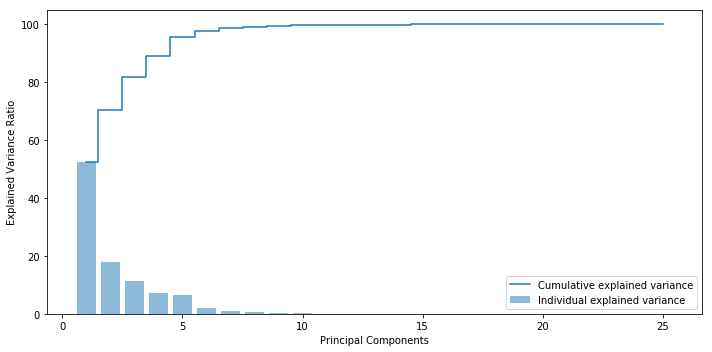

In [156]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


### Observation:
Here the first 5 principal components capture 94.23% of the explained cumulative variance among all the independent variables. Choosing 5 PCs will help to maximize the signal of the data, while preserving the low-dimensionality.

After 5 PCs the the difference between consecutive cumulative variances are getting converged, so k=5 would be preferable.

#### Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace( k≤d )

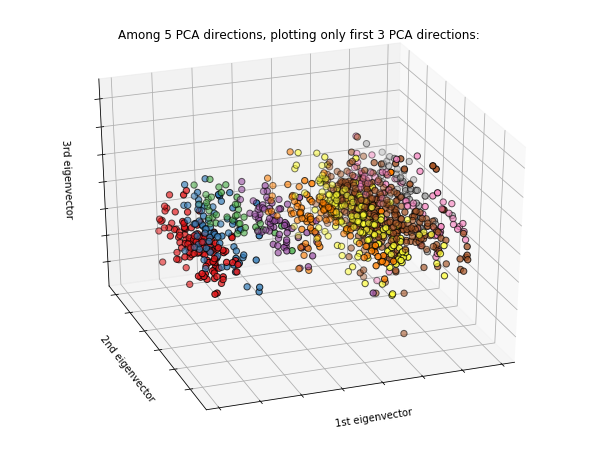

In [157]:
# Here k = 5 from the above observation

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# Build PCA on the entire dataset(all IVs)
X_reduced = PCA(n_components=5).fit_transform(pca_X_std)

# Plotting only first 3 PCA dimensions  
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=pca_X.iloc[:,0].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Among 5 PCA directions, plotting only first 3 PCA directions:")

ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Construct a projection matrix W from the "top" k eigenvectors.

In [158]:
#Sort the eigen-pairs by descending order of the eigen-values

eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(13.098920392254758,
  array([ 0.27021086,  0.26953569,  0.27063587,  0.26989701,  0.27291107,
          0.27016947,  0.23992287,  0.22032386,  0.1928083 ,  0.22393338,
          0.27047527,  0.26947313,  0.27170505,  0.26076571,  0.27199877,
         -0.00980317, -0.00360416, -0.0104804 ,  0.03400457, -0.03797103,
         -0.03889348, -0.02929913, -0.00581717,  0.00233857, -0.02331931])),
 (4.485344628532155,
  array([ 0.04602912,  0.05127146,  0.04909472,  0.05477368,  0.0491052 ,
          0.05155868,  0.0292738 ,  0.01561275,  0.00888539,  0.00359216,
         -0.01603161, -0.01694813, -0.01656149, -0.03701997, -0.00526431,
          0.03473991,  0.03294711,  0.03658647, -0.40430095,  0.45449679,
          0.4224717 ,  0.39646908,  0.3017246 ,  0.18515319,  0.38303545])),
 (2.869033009429494,
  array([ 1.66893555e-02,  1.95281499e-02,  1.55744563e-02,  1.80708368e-02,
          1.10886981e-02,  1.86141526e-02, -2.15957285e-02, -6.91401562e-02,
         -7.76666969e-02, -6.3891725

In [159]:
#Collect five eigen-vectors that correspond to the five largest values to capture about 94.23% of the variance 

W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis]))

# W is 25*5 dimensional projection matrix from the top five eigen-vectors
print('Shape of W = ', W.shape)
print('\nProjection matrix W:\n\n', W)


Shape of W =  (25, 5)

Projection matrix W:

 [[ 2.70210862e-01  4.60291212e-02  1.66893555e-02 -4.85964342e-02
   1.26712652e-01]
 [ 2.69535685e-01  5.12714641e-02  1.95281499e-02 -4.57842386e-02
   1.34271913e-01]
 [ 2.70635874e-01  4.90947205e-02  1.55744563e-02 -3.85738881e-02
   1.22271227e-01]
 [ 2.69897014e-01  5.47736807e-02  1.80708368e-02 -3.91533316e-02
   1.28422325e-01]
 [ 2.72911071e-01  4.91051987e-02  1.10886981e-02 -2.22859326e-02
   7.65019512e-02]
 [ 2.70169473e-01  5.15586755e-02  1.86141526e-02 -4.10622375e-02
   1.28112810e-01]
 [ 2.39922871e-01  2.92738002e-02 -2.15957285e-02  3.59971119e-02
  -3.31692702e-01]
 [ 2.20323856e-01  1.56127456e-02 -6.91401562e-02  9.57817660e-02
  -4.44638360e-01]
 [ 1.92808304e-01  8.88538963e-03 -7.76666969e-02  1.19739509e-01
  -5.24912944e-01]
 [ 2.23933385e-01  3.59215779e-03 -6.38917257e-02  1.05809168e-01
  -4.24104965e-01]
 [ 2.70475273e-01 -1.60316096e-02  1.12226678e-02 -2.84443800e-02
   1.25637219e-01]
 [ 2.69473125e-01 -

In [160]:
"""Using the projection matrix W transform the entire (1707, 25) dimensional dataset(pca_X_std) onto 
the five principal components by calculating the matrix dot product"""

pca_X_trnsfrmd = pca_X_std.dot(W)
print(pca_X_trnsfrmd.shape)
pca_X_trnsfrmd


(1113, 5)


array([[-7.10325326, -3.75889746, -1.75148855,  0.29769887,  0.96587209],
       [-7.12287121, -3.5319287 , -2.04313171,  0.46807642,  0.92702318],
       [-7.1164107 , -2.57063974, -1.53210664,  1.00845093,  0.93542633],
       ...,
       [ 3.56898815,  1.97886761, -1.06701187,  3.88939785, -2.90534134],
       [ 3.62652278,  2.64780454,  0.59744056,  4.03472402, -2.95046972],
       [ 3.64684259,  1.74804963, -0.56315219,  3.12901106, -2.99322676]])

### Data preparation for model building

In [161]:
# Combining all the independent variables (PCA variables and other variables) for model building
X = np.hstack((pca_X_trnsfrmd, other_X_std))
print('X.shape = ', X.shape)

new_dataset = pd.DataFrame()
new_dataset = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
new_dataset.to_csv('trnsfrmd_data.csv')

X.shape =  (1113, 24)


# Hyperparameter tuning

### Models - with Hyper-parameter tuning

In [162]:
# Create objects of required models

models = []
models.append(("LR", LogisticRegression(class_weight='balanced', random_state=7)))
models.append(("GNB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=7)))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVC", SVC(random_state=7)))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging", BaggingClassifier()))
models.append(("GradientBoosting", GradientBoostingClassifier()))
models.append(("Ridge", RidgeClassifier()))
models.append(("MLP", MLPClassifier()))

#models

In [163]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 10
tscv = TimeSeriesSplit(n_splits = n_splits)

for name, model in models:
    
    if name=='KNN':
        
        print('{} Model'.format(name))
        
        results = pd.DataFrame()
        k_values = np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29])
        parameters = {'n_neighbors':k_values}

        knn_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=tscv.split(X))
        knn_grid.fit(X,y)
        results = pd.DataFrame(knn_grid.cv_results_)
        results.to_csv('KNN_results.csv')
        #print(results.head())

        print('\n\n******************** Start of KNN model ********************')
        print('\n********** Best KNN model object ********** \n\n', knn_grid.best_estimator_)
        print('\n********** Detailed report of  KNN model with {} splits of Time-Series data **********\n'.format(n_splits))
        print(results.iloc[knn_grid.best_index_, :])
        print('\n******************** End of KNN model ******************** \n\n')
        
    elif name=='SVC':
        
        print('{} Model'.format(name))
        
        results = pd.DataFrame()
        Cs = [0.001, 0.01, 0.1, 1]
        gammas = [0.001, 0.01, 0.1, 1]
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']
        parameters = {'C':Cs, 'gamma':gammas, 'kernel':kernels}
        
        svc_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=tscv.split(X))
        svc_grid.fit(X,y)
        results = pd.DataFrame(svc_grid.cv_results_)
        results.to_csv('SVC_results.csv')
        #print(results.head())

        print('\n\n******************** Start of SVC model ********************')
        print('\n********** Best SVC model object ********** \n\n', svc_grid.best_estimator_)
        print('\n********** Detailed report of SVC model with {} splits of Time-Series data **********\n'.format(n_splits))
        print(results.iloc[svc_grid.best_index_, :])
        print('\n******************** End of SVC model ******************** \n\n')
        
    elif name=='LR':
        
        print('{} Model'.format(name))
        
        results = pd.DataFrame()
        penalty = ['l1','l2']
        Cs = [0.001, 0.01, 0.1]
        parameters = {'penalty':penalty, 'C':Cs}
        
        logit_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=tscv.split(X))
        logit_grid.fit(X,y)
        results = pd.DataFrame(logit_grid.cv_results_)
        results.to_csv('LogitReg_results.csv')
        #print(results.head())

        print('\n\n******************** Start of Logistic Regression model ********************')
        print('\n********** Best Logistic Regression model object ********** \n\n', logit_grid.best_estimator_)
        print('\n********** Detailed report of Logistic Regression model with {} splits of Time-Series data **********\n'.format(n_splits))
        print(results.iloc[logit_grid.best_index_, :])
        print('\n******************** End of Logistic Regression model ******************** \n\n')
        
    
    elif name=='DecisionTree':
        
        print('{} Model'.format(name))
        
        results = pd.DataFrame()
        parameters = {'max_depth': np.arange(3, 10)}        
        
        dt_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=tscv.split(X))
        dt_grid.fit(X,y)
        results = pd.DataFrame(dt_grid.cv_results_)
        results.to_csv('DT_results.csv')
        #print(results.head())

        print('\n\n******************** Start of Decision Tree Classifier ********************')
        print('\n********** Best Logistic Regression model object ********** \n\n', dt_grid.best_estimator_)
        print('\n********** Detailed report of Decision Tree Classifier model with {} splits of Time-Series data **********\n'.format(n_splits))
        print(results.iloc[dt_grid.best_index_, :])
        print('\n******************** End of Decision Tree Classifier model ******************** \n\n')
        
        
        
        

LR Model


******************** Start of Logistic Regression model ********************

********** Best Logistic Regression model object ********** 

 LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=7,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

********** Detailed report of Logistic Regression model with 10 splits of Time-Series data **********

mean_fit_time                          0.00248921
mean_score_time                        0.00191188
mean_test_score                          0.972277
mean_train_score                         0.983649
param_C                                       0.1
param_penalty                                  l1
params                {'C': 0.1, 'penalty': 'l1'}
rank_test_score                                 1
split0_test_score                        0.970297
split0_train_score        